In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [2]:
pum_df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [3]:
pum_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
pum_df.size

32500

In [5]:
pum_df.shape

(2500, 13)

In [6]:
pum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [7]:
# check for duplication datapoint 
pum_df.duplicated().sum()

0

In [8]:
pum_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


# Data Exploration 

###  Summary Statistics 

In [9]:
pum_df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [10]:
pum_df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [11]:
pum_df["Class"]

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

In [12]:
pum_df.apply(lambda x: len(x.unique()))


Area                 2424
Perimeter            2490
Major_Axis_Length    2499
Minor_Axis_Length    2497
Convex_Area          2445
Equiv_Diameter       2424
Eccentricity         1295
Solidity              166
Extent               1392
Roundness            1480
Aspect_Ration        2237
Compactness          1405
Class                   2
dtype: int64

#### Generate Feature Matrix and Labels Array

In [13]:
dataX = pum_df.copy().drop(["Class"],axis=1)
dataY = pum_df["Class"].copy()

In [14]:
sX = StandardScaler(copy=True)
dataX.loc[:, :] = sX.fit_transform(dataX)

In [15]:
dataX.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03
mean,3.183231e-16,8.185452e-16,1.136868e-15,-6.821210e-17,-5.229595e-16,3.410605e-16,9.094947e-16,2.377192e-14,1.591616e-16,2.910383e-15,-5.911716e-16,-5.002221e-16
std,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00
min,-2.394946e+00,-2.396623e+00,-2.414559e+00,-3.160797e+00,-2.408347e+00,-2.688179e+00,-8.166359e+00,-2.029595e+01,-3.697851e+00,-4.237544e+00,-2.826550e+00,-2.701293e+00
25%,-7.241533e-01,-7.456364e-01,-7.406740e-01,-6.246192e-01,-7.263889e-01,-7.128569e-01,-6.461572e-01,-3.411498e-01,-5.632791e-01,-7.088321e-01,-7.617178e-01,-7.660832e-01
50%,-1.158137e-01,-6.048465e-02,-1.263728e-01,-4.687420e-02,-1.188899e-01,-7.546080e-02,6.246019e-02,2.314413e-01,3.258621e-01,1.111954e-01,-1.820076e-01,6.746573e-02
75%,6.660392e-01,6.688495e-01,6.427063e-01,6.387421e-01,6.750553e-01,6.963761e-01,8.004187e-01,5.749960e-01,7.720747e-01,7.653394e-01,6.975283e-01,7.422210e-01
max,4.092863e+00,3.928894e+00,3.651604e+00,3.435560e+00,4.133022e+00,3.632623e+00,1.931438e+00,1.405253e+00,2.239609e+00,2.648183e+00,3.490282e+00,3.784274e+00


### Check correlation of features

In [16]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns, columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [17]:
correlationMatrix

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.0,0.93,0.79,0.69,1.0,1.0,0.16,0.16,-0.01,-0.15,0.16,-0.16
Perimeter,0.93,1.0,0.95,0.39,0.93,0.93,0.46,0.07,-0.14,-0.5,0.49,-0.48
Major_Axis_Length,0.79,0.95,1.0,0.1,0.79,0.79,0.7,0.12,-0.21,-0.68,0.73,-0.73
Minor_Axis_Length,0.69,0.39,0.1,1.0,0.69,0.69,-0.59,0.09,0.23,0.56,-0.6,0.6
Convex_Area,1.0,0.93,0.79,0.69,1.0,1.0,0.16,0.14,-0.02,-0.15,0.16,-0.16
Equiv_Diameter,1.0,0.93,0.79,0.69,1.0,1.0,0.16,0.16,-0.01,-0.15,0.16,-0.16
Eccentricity,0.16,0.46,0.7,-0.59,0.16,0.16,1.0,0.04,-0.33,-0.89,0.95,-0.98
Solidity,0.16,0.07,0.12,0.09,0.14,0.16,0.04,1.0,0.07,0.2,0.03,-0.02
Extent,-0.01,-0.14,-0.21,0.23,-0.02,-0.01,-0.33,0.07,1.0,0.35,-0.33,0.34
Roundness,-0.15,-0.5,-0.68,0.56,-0.15,-0.15,-0.89,0.2,0.35,1.0,-0.94,0.93


## Data Visualization

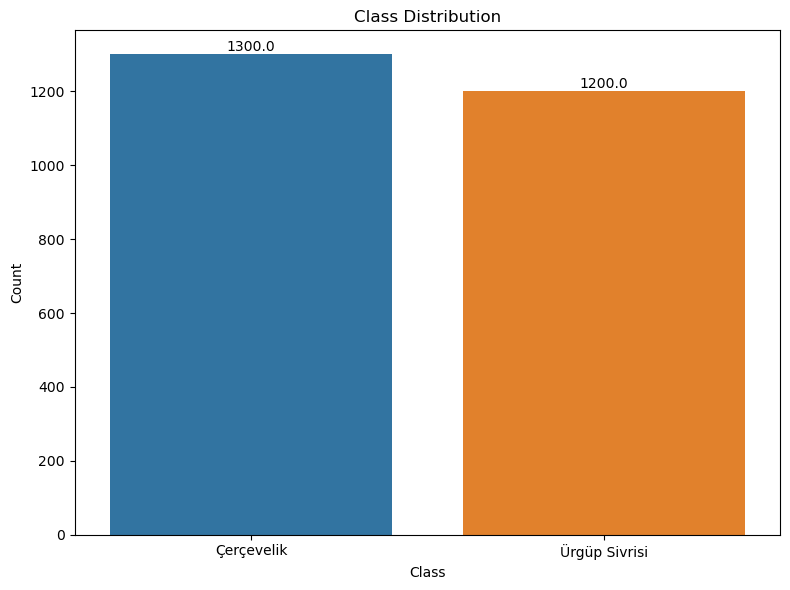

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Class", data=pum_df)

# Add the counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [19]:
def plotGraph (dataset, feature):
    #plt.style.use('solarize_Light2')
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.title(f'{feature}Distribution Graph')
    sns.distplot(dataset[feature], color='red')
    
    plt.subplot(2,2,2)
    plt.title(f'{feature}Histogram Graph',color='red')
    sns.histplot(dataset[feature], color='red', kde=True, bins=50)
    
    plt.subplot(2,2,3)
    plt.title(f'{feature}Boxplot')
    sns.boxplot(dataset[feature], color='red')
    plt.show()

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


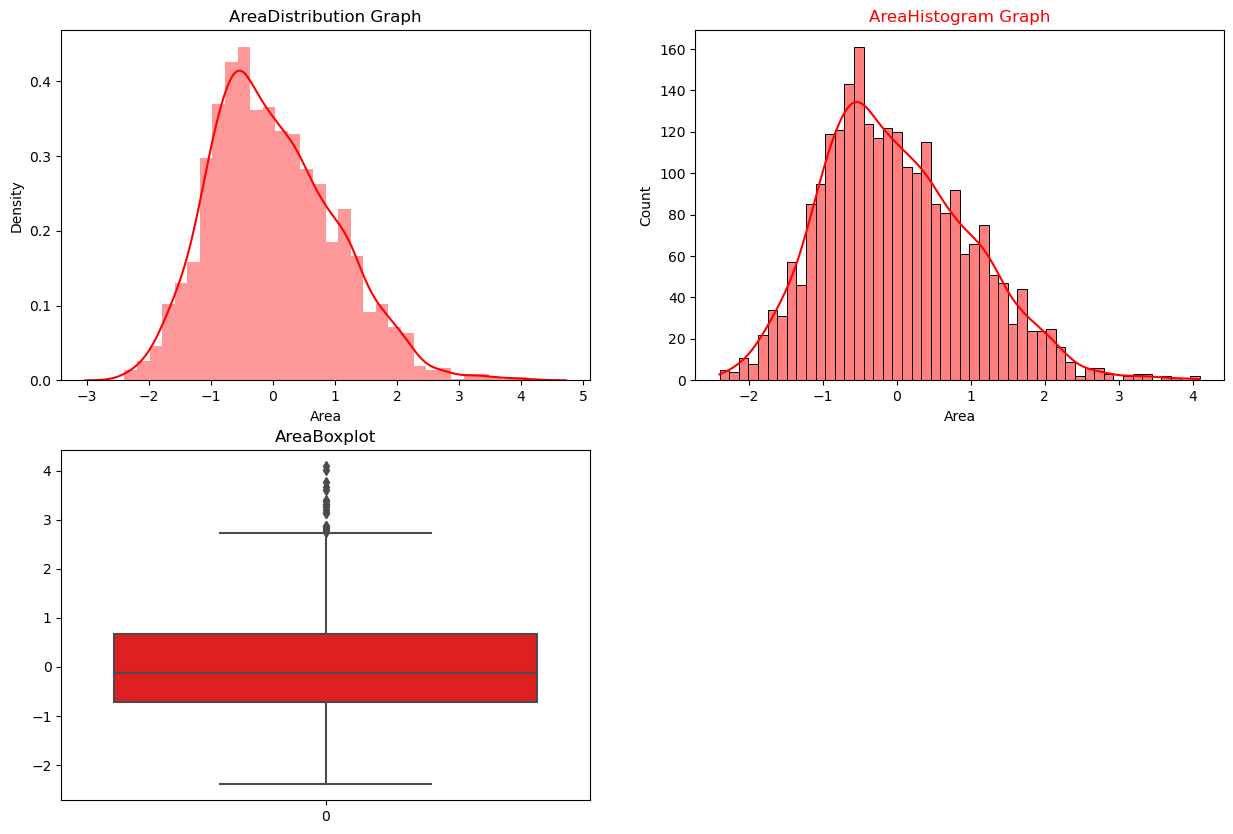

In [20]:
plotGraph(dataX,'Area')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


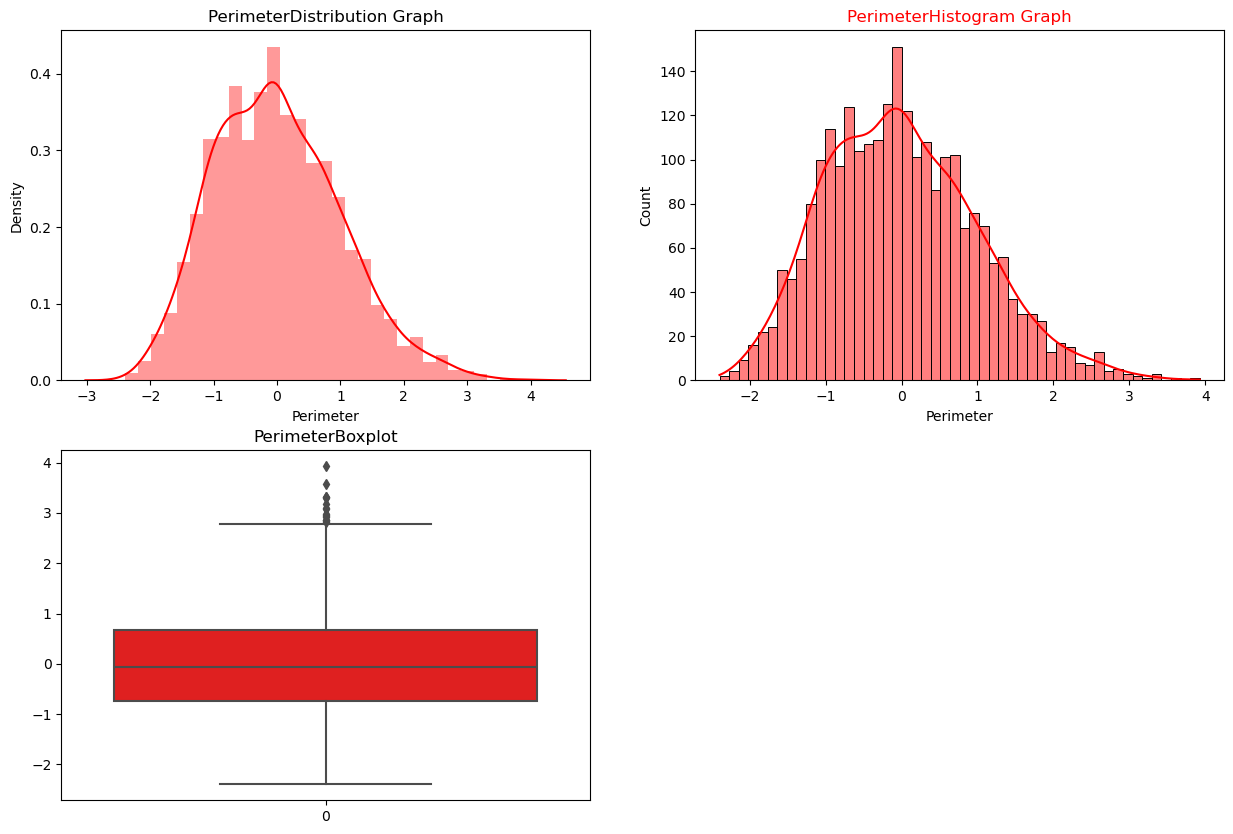

In [21]:
plotGraph(dataX,'Perimeter')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


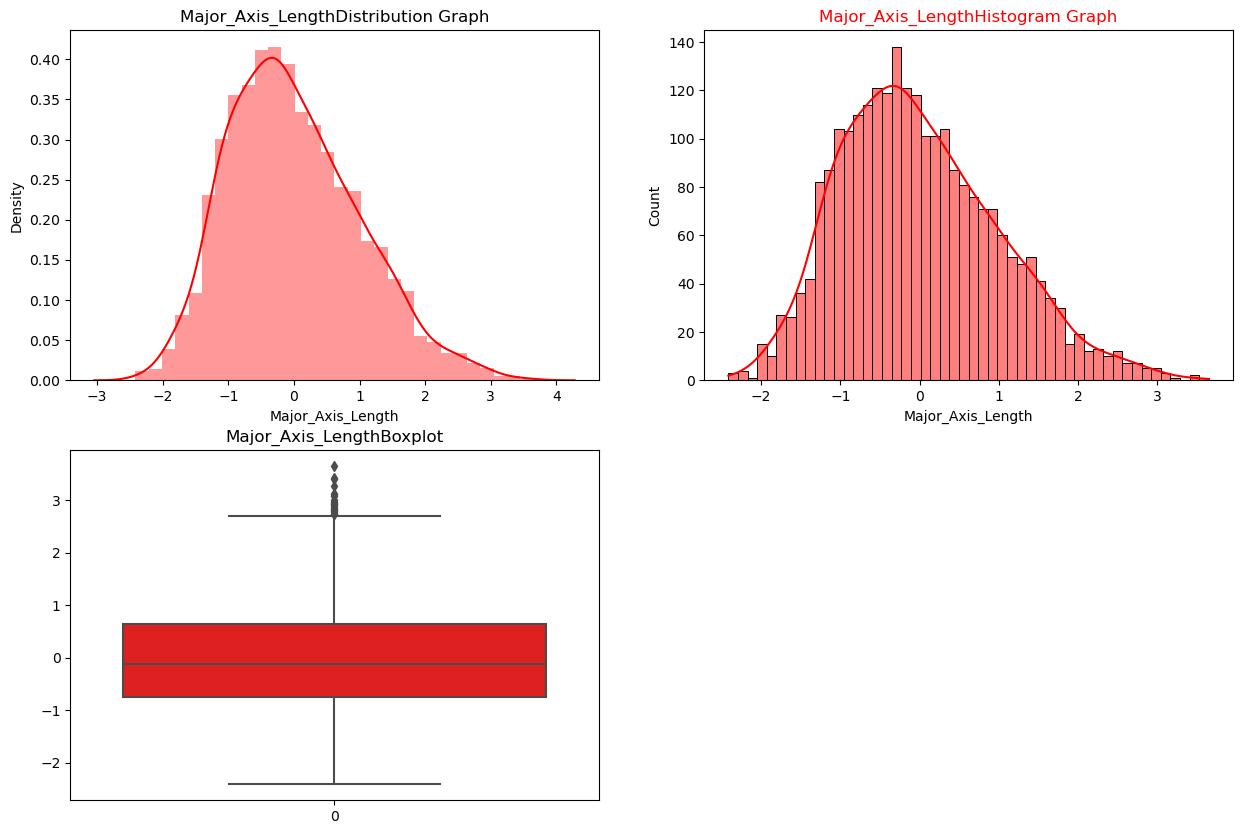

In [22]:
plotGraph(dataX,'Major_Axis_Length')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


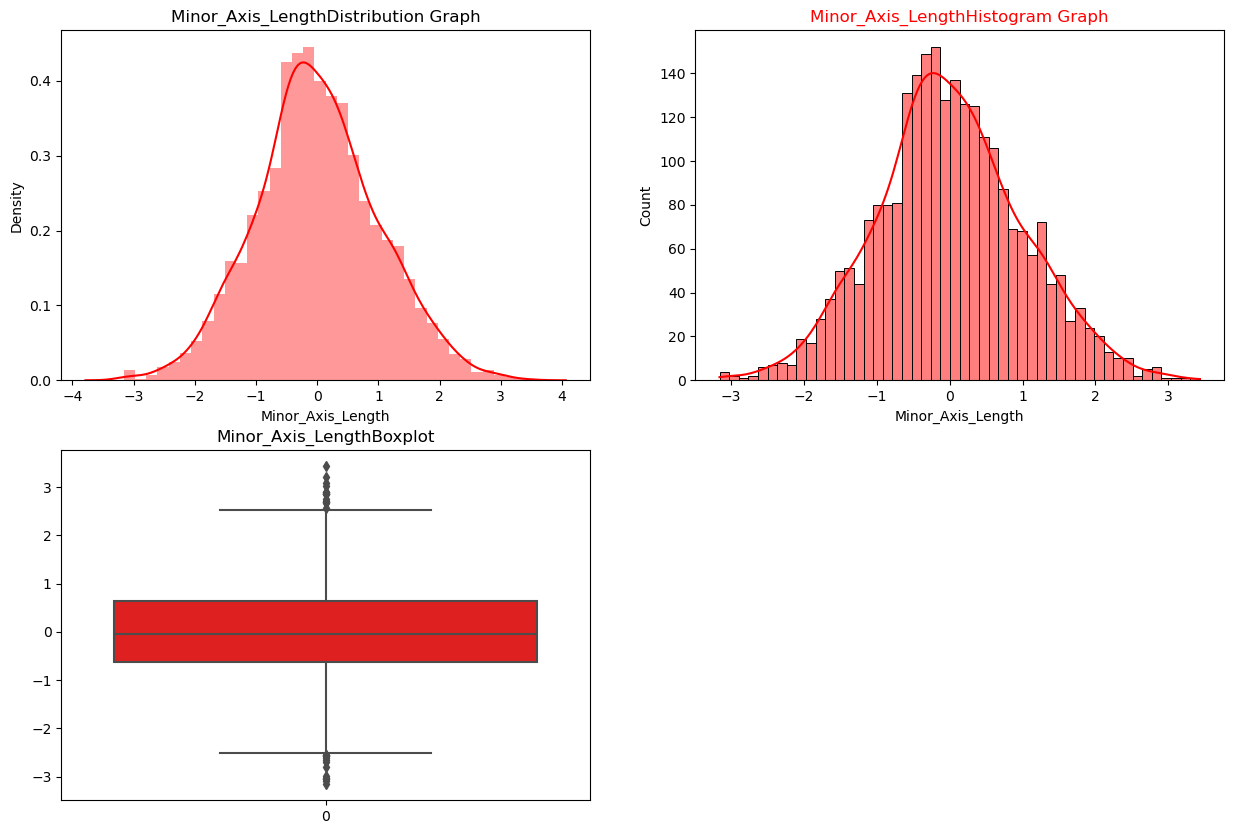

In [23]:
plotGraph(dataX,'Minor_Axis_Length')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


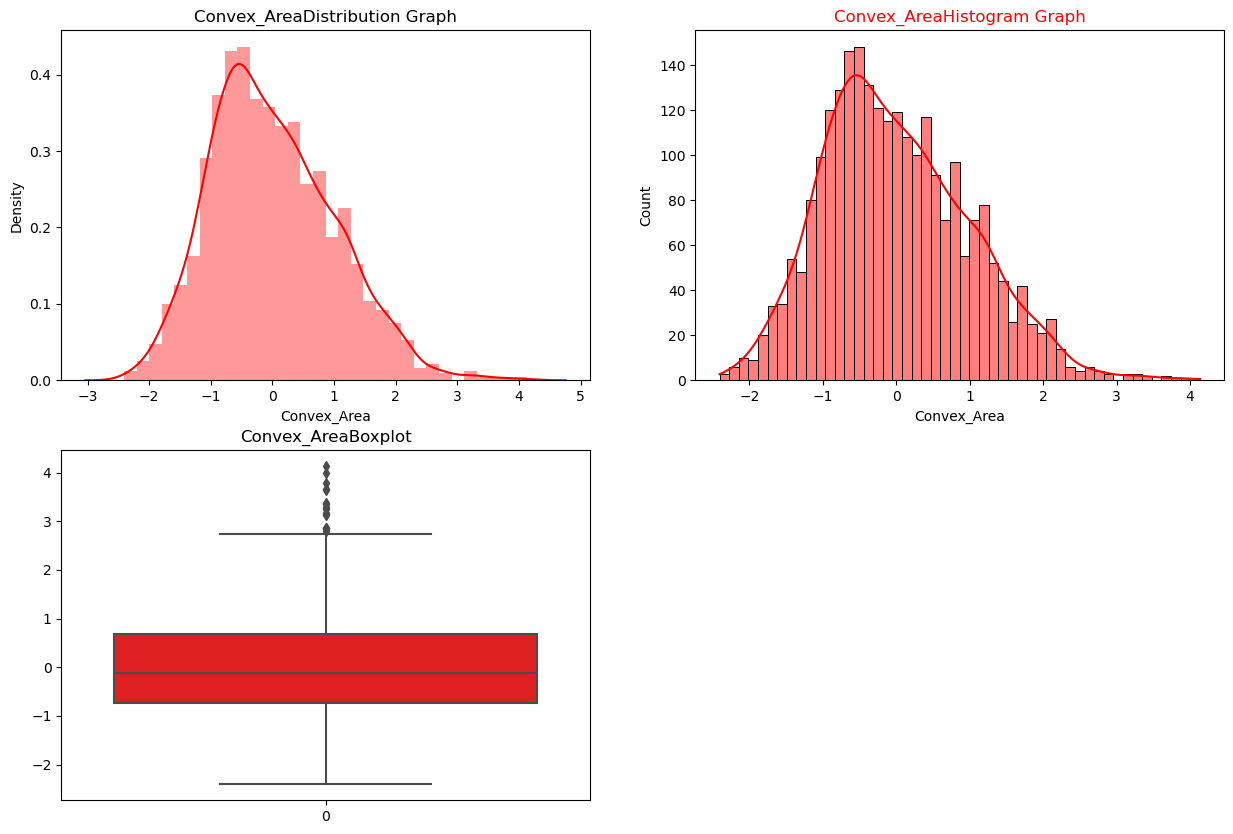

In [24]:
plotGraph(dataX,'Convex_Area')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


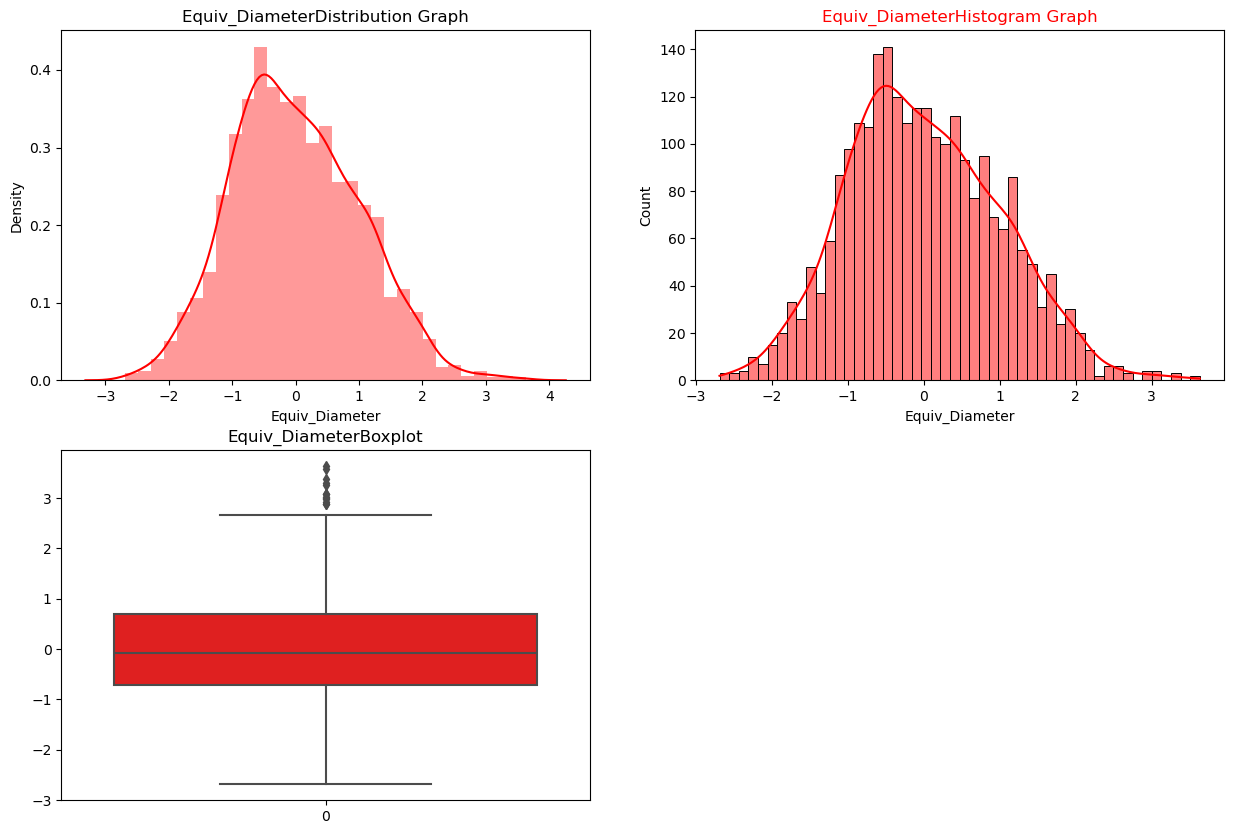

In [25]:
plotGraph(dataX,'Equiv_Diameter')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


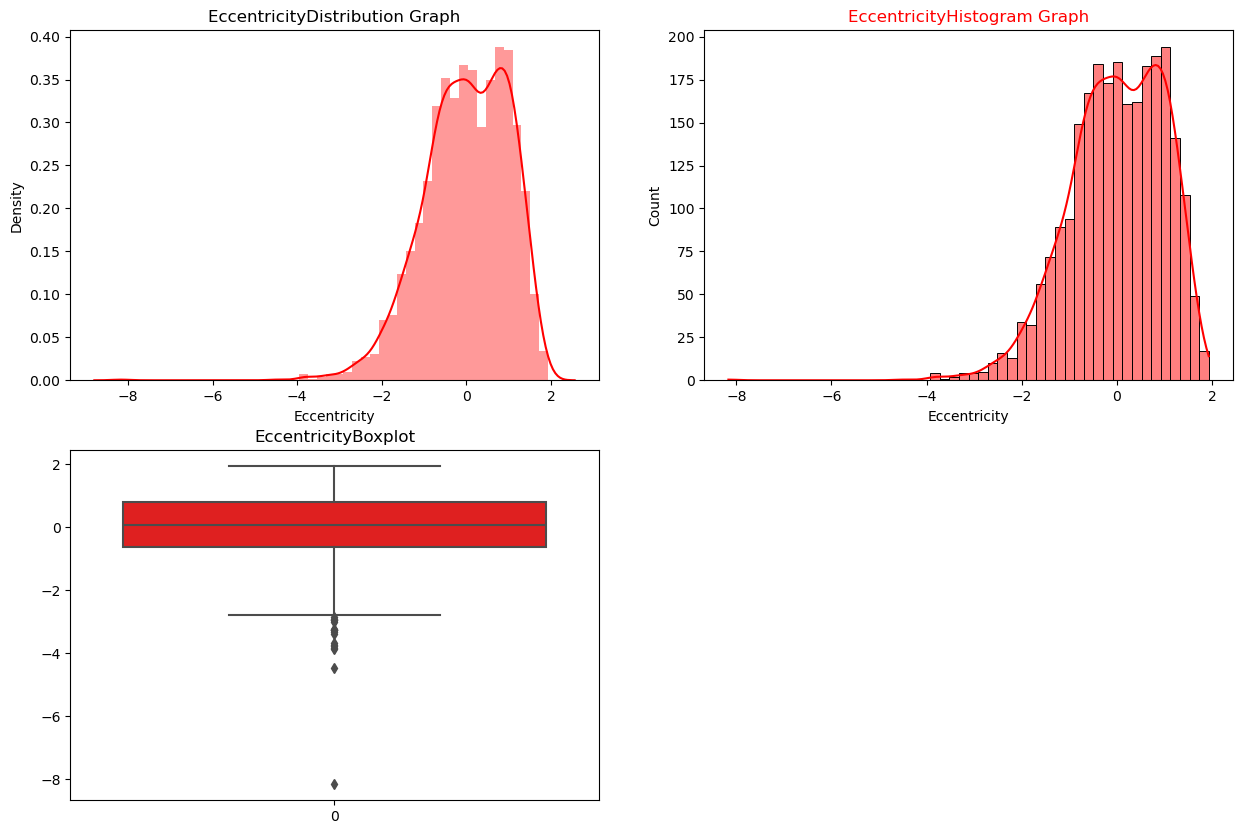

In [26]:
plotGraph(dataX,'Eccentricity')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


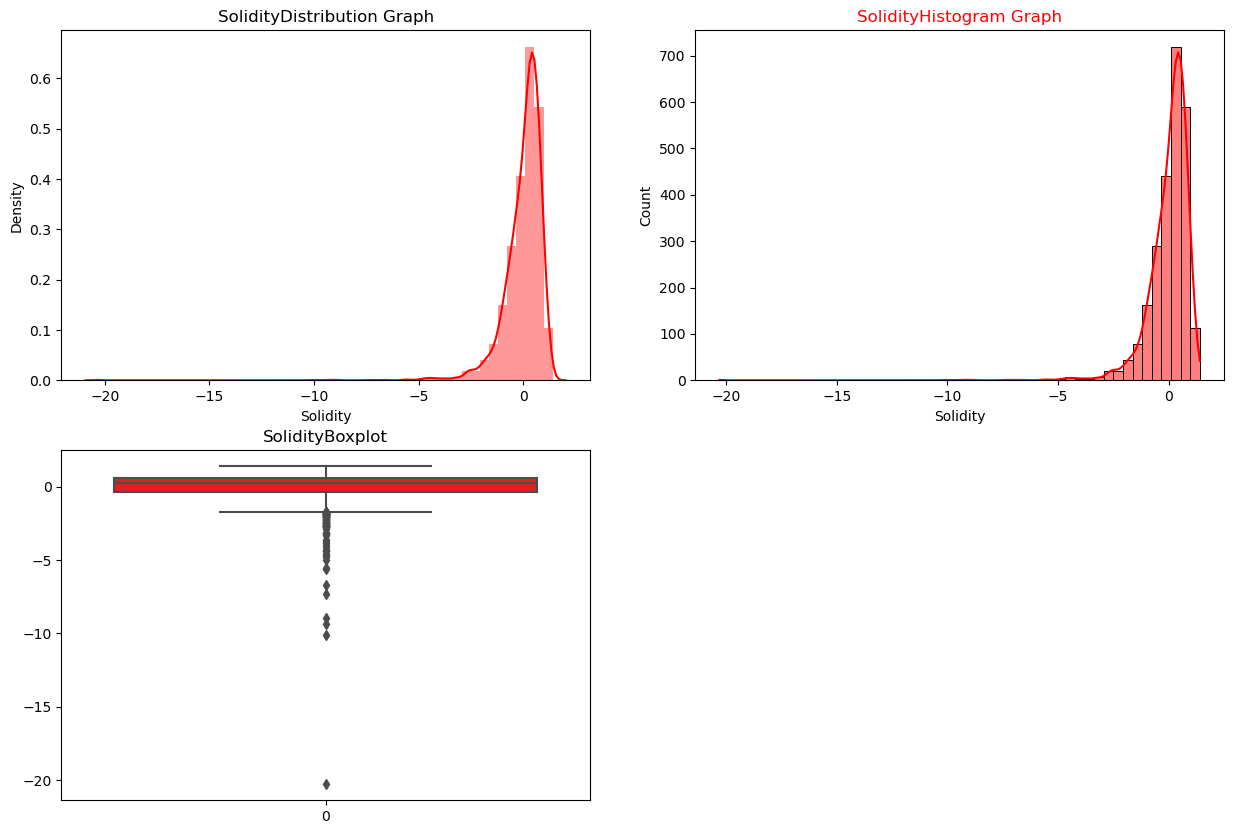

In [27]:
plotGraph(dataX,'Solidity')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


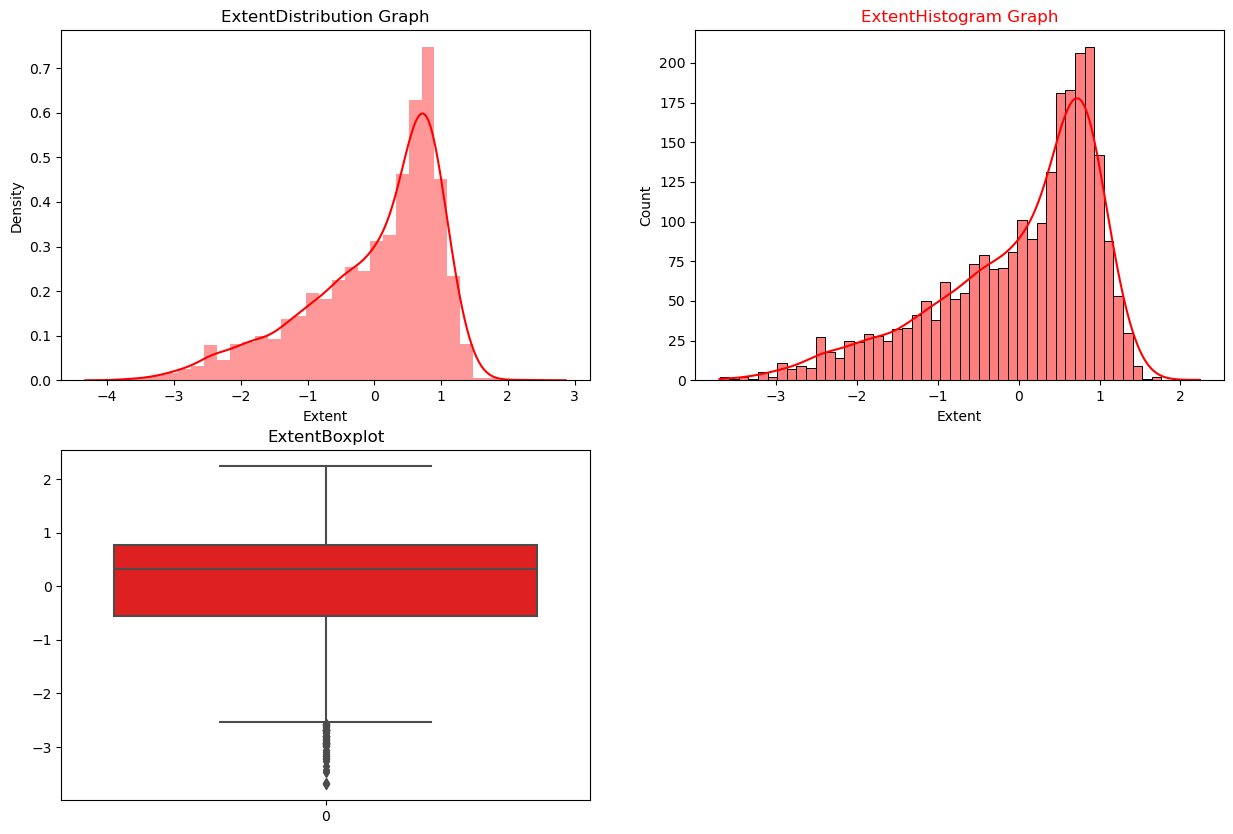

In [28]:
plotGraph(dataX,'Extent')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


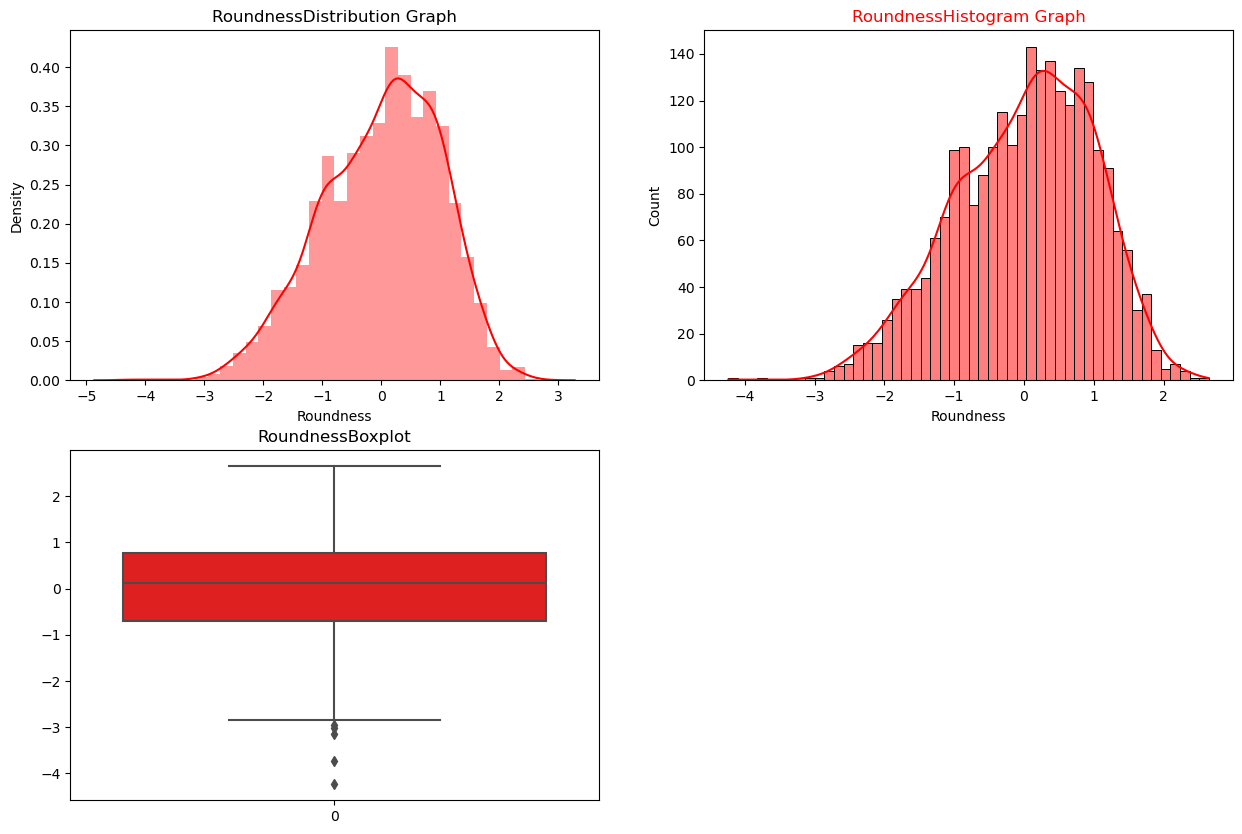

In [29]:
plotGraph(dataX,'Roundness')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


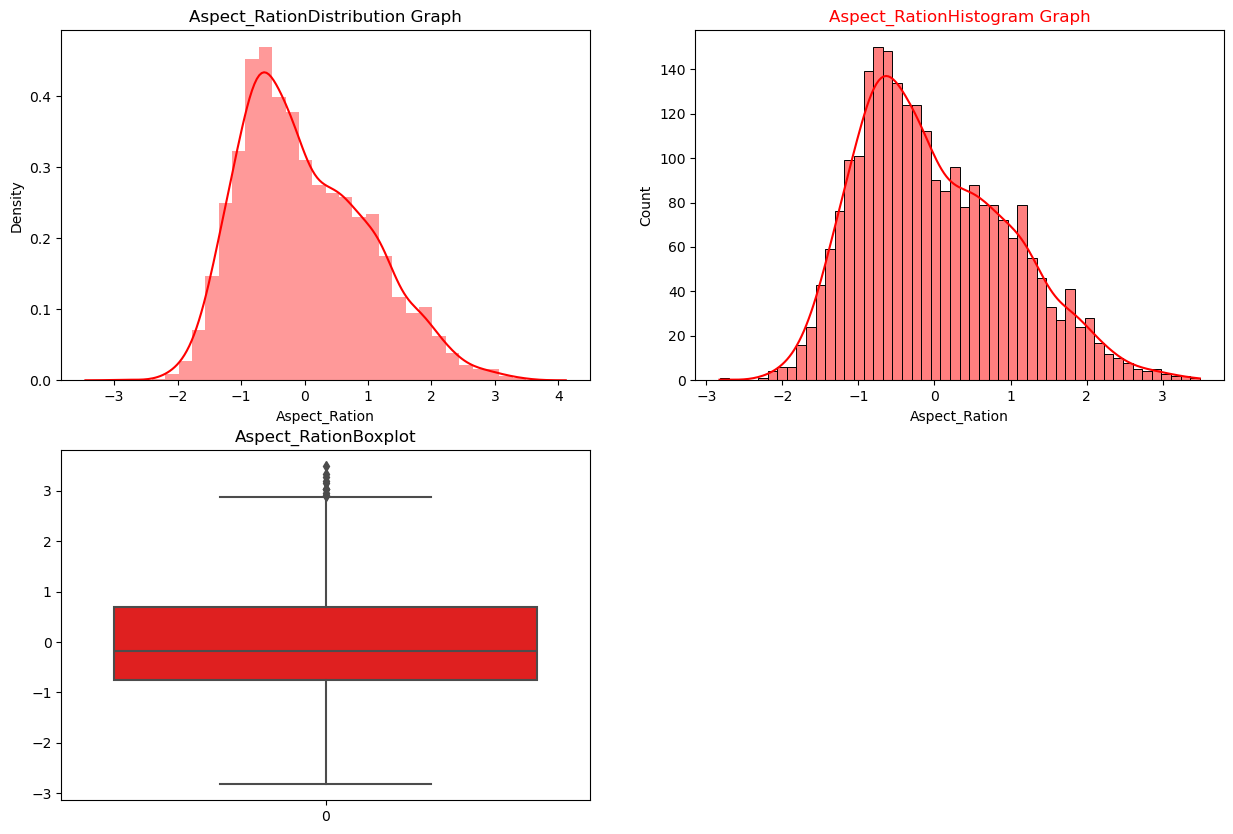

In [30]:
plotGraph(dataX,'Aspect_Ration')

C:\Users\modol\AppData\Local\Temp\ipykernel_2604\195015095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color='red')


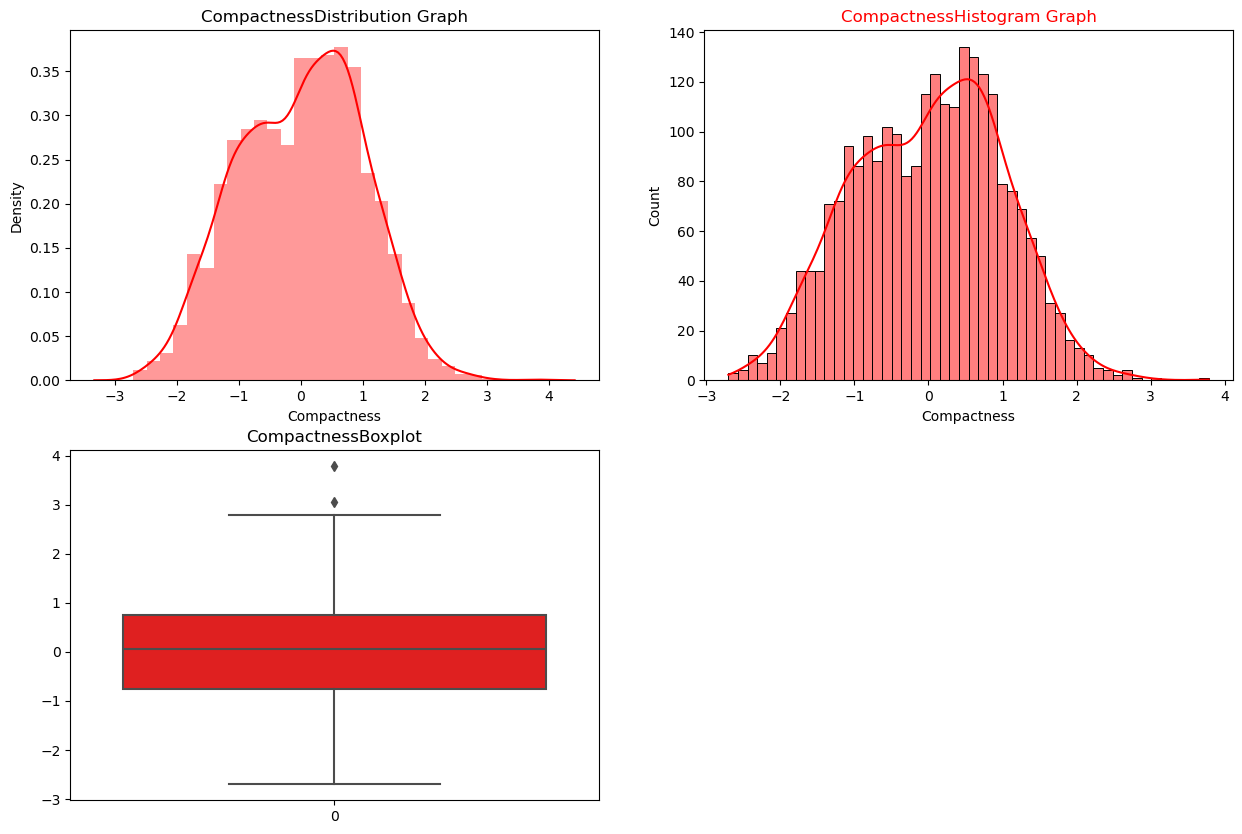

In [31]:
plotGraph(dataX,'Compactness')

In [32]:
'Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length','Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent','Roundness', 'Aspect_Ration', 'Compactness'

('Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Convex_Area',
 'Equiv_Diameter',
 'Eccentricity',
 'Solidity',
 'Extent',
 'Roundness',
 'Aspect_Ration',
 'Compactness')

In [33]:
labels = pum_df['Class']
features_to_scale = pum_df.drop(columns=['Class'])

# Apply standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add the 'Class' column back
scaled_df['Class'] = labels.values

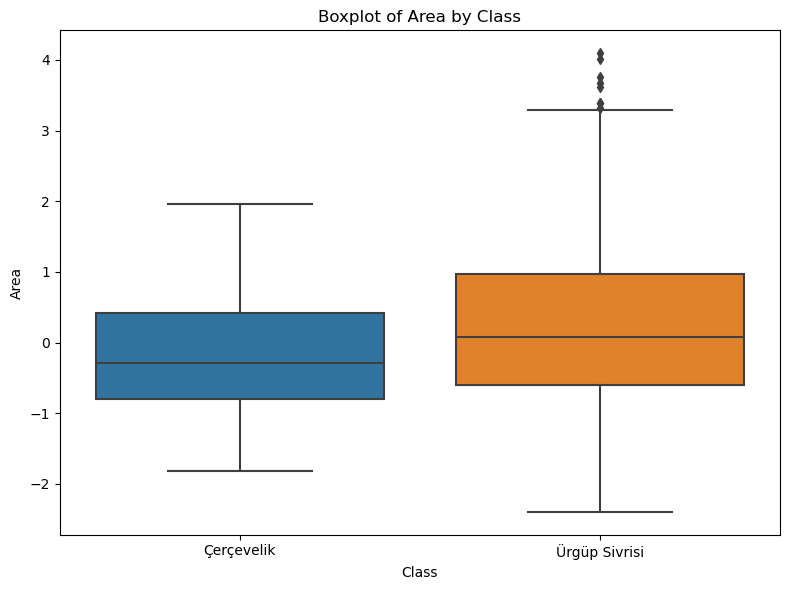

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Area', data=scaled_df)

plt.title("Boxplot of Area by Class")
plt.xlabel("Class")
plt.ylabel("Area")
plt.tight_layout()
plt.show()

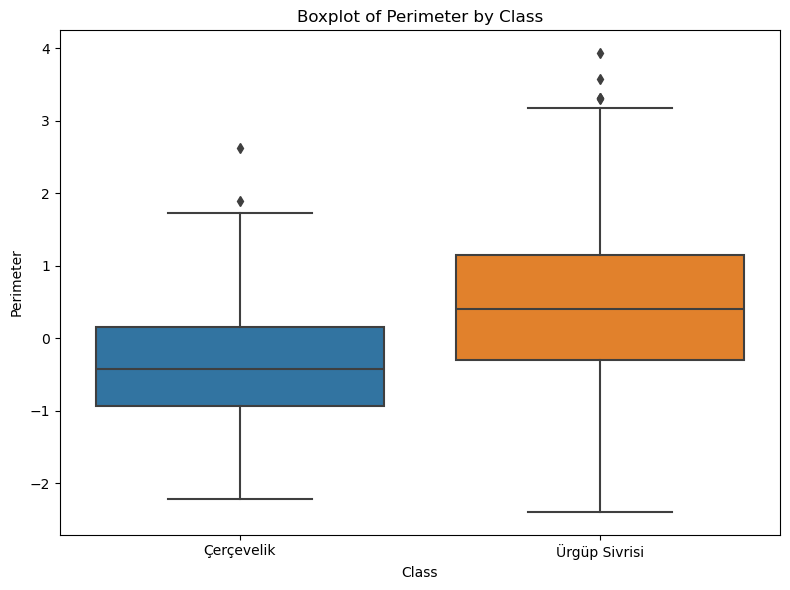

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Perimeter', data=scaled_df)

plt.title("Boxplot of Perimeter by Class")
plt.xlabel("Class")
plt.ylabel("Perimeter")
plt.tight_layout()
plt.show()

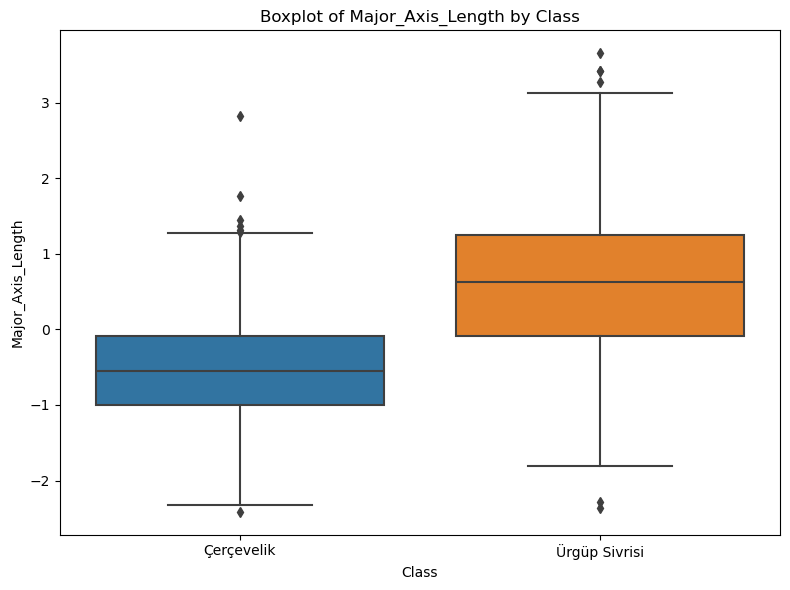

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Major_Axis_Length', data=scaled_df)

plt.title("Boxplot of Major_Axis_Length by Class")
plt.xlabel("Class")
plt.ylabel("Major_Axis_Length")
plt.tight_layout()
plt.show()

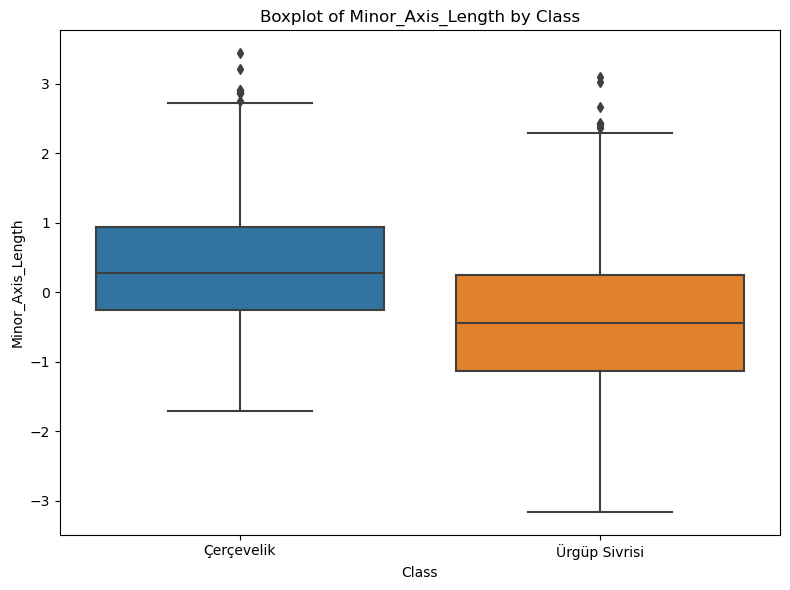

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Minor_Axis_Length', data=scaled_df)

plt.title("Boxplot of Minor_Axis_Length by Class")
plt.xlabel("Class")
plt.ylabel("Minor_Axis_Length")
plt.tight_layout()
plt.show()

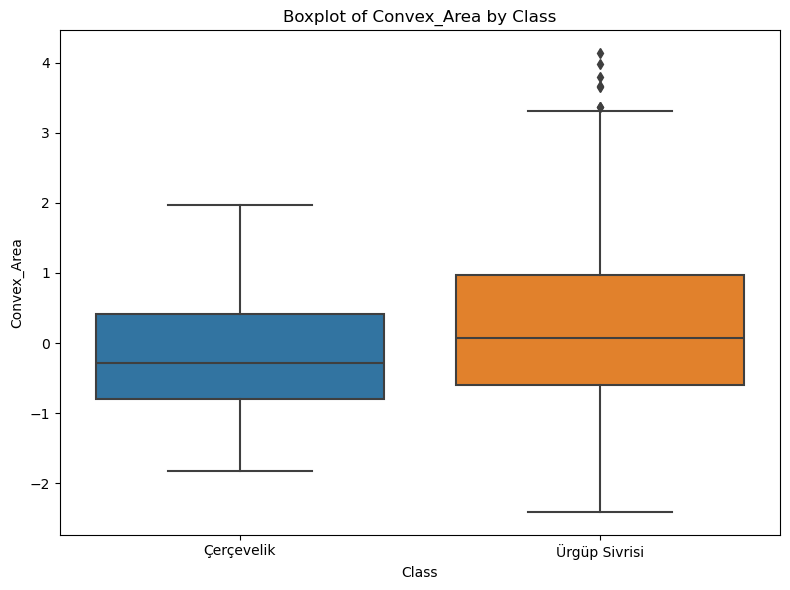

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Convex_Area', data=scaled_df)

plt.title("Boxplot of Convex_Area by Class")
plt.xlabel("Class")
plt.ylabel("Convex_Area")
plt.tight_layout()
plt.show()

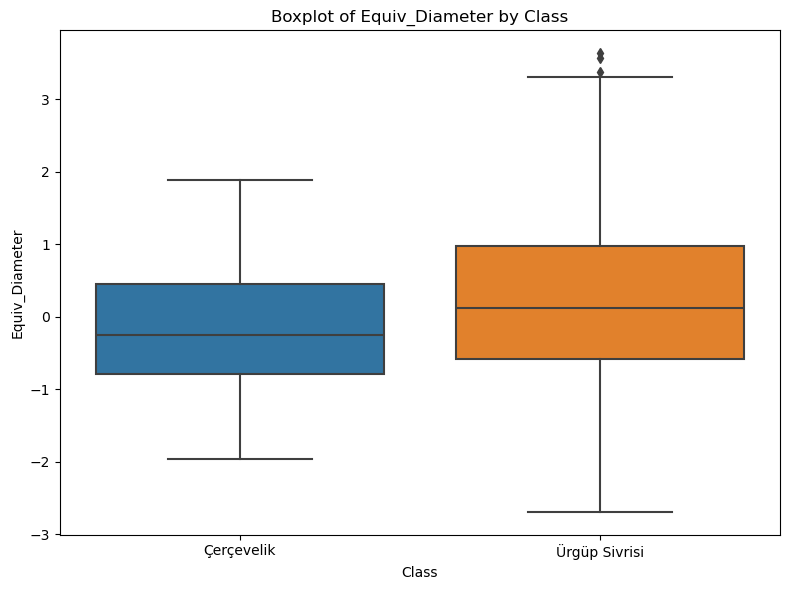

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Equiv_Diameter', data=scaled_df)

plt.title("Boxplot of Equiv_Diameter by Class")
plt.xlabel("Class")
plt.ylabel("Equiv_Diameter")
plt.tight_layout()
plt.show()

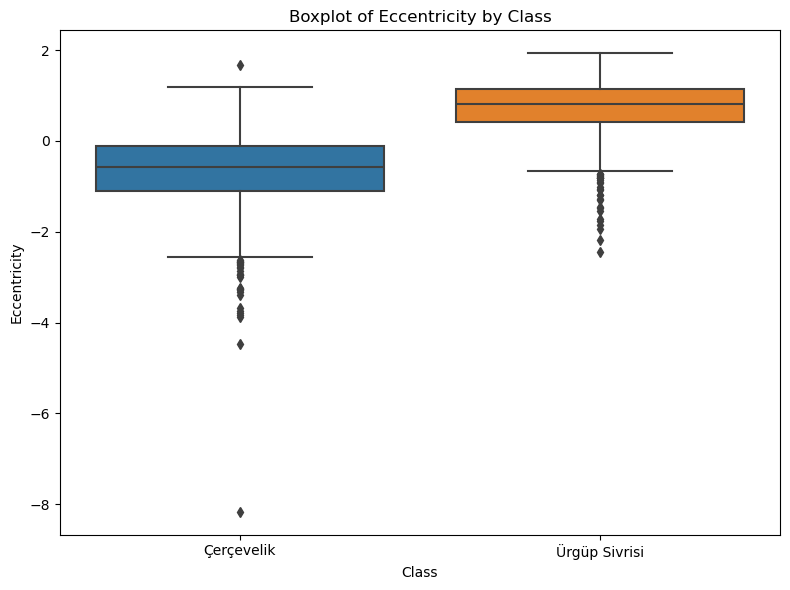

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Eccentricity', data=scaled_df)

plt.title("Boxplot of Eccentricity by Class")
plt.xlabel("Class")
plt.ylabel("Eccentricity")
plt.tight_layout()
plt.show()

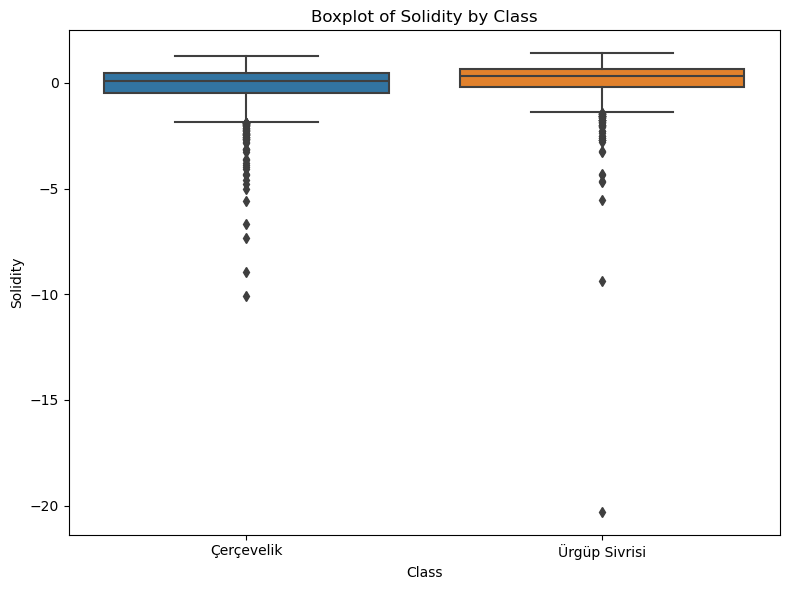

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Solidity', data=scaled_df)

plt.title("Boxplot of Solidity by Class")
plt.xlabel("Class")
plt.ylabel("Solidity")
plt.tight_layout()
plt.show()

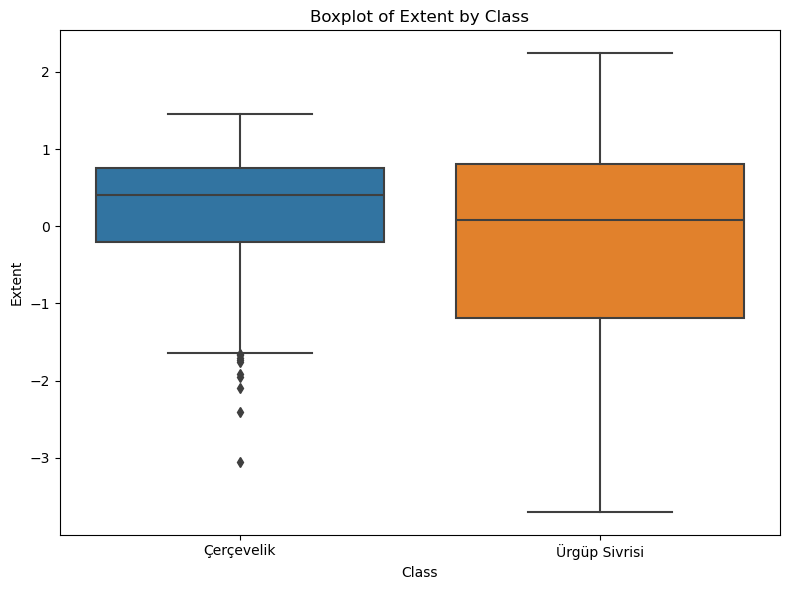

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Extent', data=scaled_df)

plt.title("Boxplot of Extent by Class")
plt.xlabel("Class")
plt.ylabel("Extent")
plt.tight_layout()
plt.show()

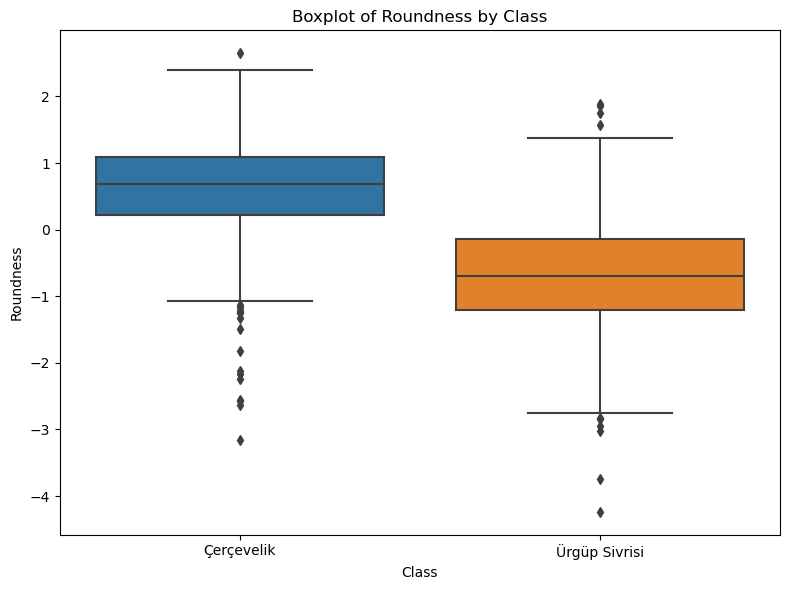

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Roundness', data=scaled_df)

plt.title("Boxplot of Roundness by Class")
plt.xlabel("Class")
plt.ylabel("Roundness")
plt.tight_layout()
plt.show()

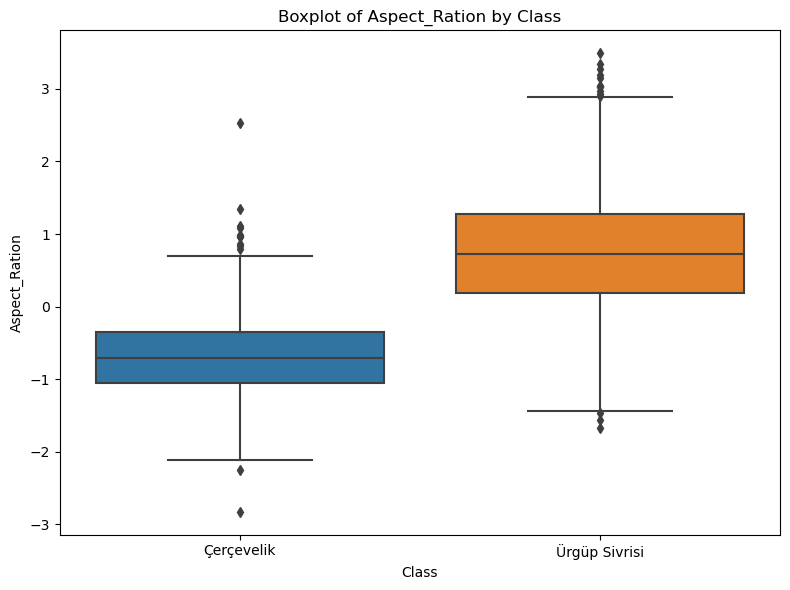

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Aspect_Ration', data=scaled_df)

plt.title("Boxplot of Aspect_Ration by Class")
plt.xlabel("Class")
plt.ylabel("Aspect_Ration")
plt.tight_layout()
plt.show()

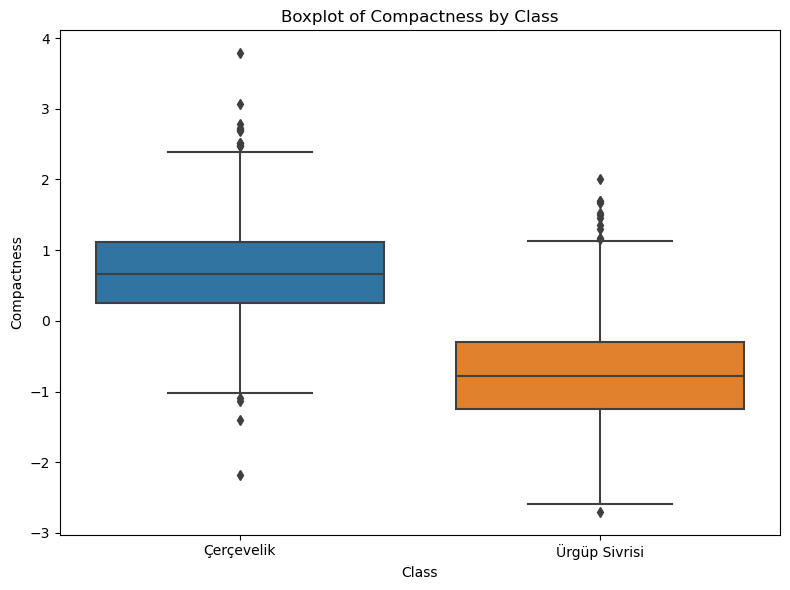

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Compactness', data=scaled_df)

plt.title("Boxplot of Compactness by Class")
plt.xlabel("Class")
plt.ylabel("Compactness")
plt.tight_layout()
plt.show()

# Model Preparation

## Split into Training and Test Sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.20, random_state=42, stratify=dataY)

In [47]:
print(dataX.shape,X_train.shape, X_test.shape)

(2500, 12) (2000, 12) (500, 12)


In [48]:
'''from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [51]:
models= [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),LinearDiscriminantAnalysis(),GaussianNB(),SVC(),RandomForestClassifier(), CatBoostClassifier(), LGBMClassifier(), XGBClassifier(),MLPClassifier()]

In [52]:
seed = 42
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CABC', CatBoostClassifier()))
models.append(('LGBMC', LGBMClassifier()))
models.append(('XGBC', XGBClassifier()))
models.append(('MLP', MLPClassifier()))

In [53]:
results = []
names = []
scoring = 'accuracy' 
import warnings
warnings.filterwarnings("ignore") 
for name, model in models:
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train_encoded, scoring=scoring)
    results.append(cv_results) 
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.884000 (0.020530)
LDA: 0.881000 (0.024829)
KNN: 0.876000 (0.018815)
DTC: 0.835500 (0.016078)
GNB: 0.872500 (0.022858)
SVM: 0.890000 (0.019429)
RFC: 0.887500 (0.022694)
Learning rate set to 0.012592
0:	learn: 0.6804972	total: 145ms	remaining: 2m 24s
1:	learn: 0.6707132	total: 151ms	remaining: 1m 15s
2:	learn: 0.6597826	total: 159ms	remaining: 52.9s
3:	learn: 0.6489458	total: 165ms	remaining: 41.1s
4:	learn: 0.6378056	total: 172ms	remaining: 34.3s
5:	learn: 0.6286073	total: 178ms	remaining: 29.5s
6:	learn: 0.6180543	total: 184ms	remaining: 26.2s
7:	learn: 0.6093175	total: 191ms	remaining: 23.7s
8:	learn: 0.6012759	total: 197ms	remaining: 21.7s
9:	learn: 0.5914897	total: 203ms	remaining: 20.1s
10:	learn: 0.5839966	total: 209ms	remaining: 18.8s
11:	learn: 0.5756506	total: 218ms	remaining: 17.9s
12:	learn: 0.5667987	total: 228ms	remaining: 17.3s
13:	learn: 0.5575938	total: 239ms	remaining: 16.8s
14:	learn: 0.5489127	total: 245ms	remaining: 16.1s
15:	learn: 0.5414120	total: 251ms	remai

# Machine Learning Models

## Logistic Regression

####  Set hyperparameters

In [54]:
penalty = 'l2'
dual = False
tol = 1e-4
C = 1.0
fit_intercept = True
intercept_scaling = 1
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
max_iter = 100
multi_class = 'auto'
verbose = 0
warm_start = False
n_jobs = -1
l1_ratio = None

# Create Logistic Regression model
logReg = LogisticRegression(
    penalty=penalty,
    dual=dual,
    tol=tol,
    C=C,
    fit_intercept=fit_intercept,
    intercept_scaling=intercept_scaling,
    class_weight=class_weight,
    random_state=random_state,
    solver=solver,
    max_iter=max_iter,
    multi_class=multi_class,
    verbose=verbose,
    warm_start=warm_start,
    n_jobs=n_jobs,
    l1_ratio=l1_ratio
)

In [55]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [56]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index,columns=[0,1])
model = logReg
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

    

Training Log Loss:  0.30969869699062696
CV Log Loss:  0.23650257138809458
Training Log Loss:  0.2975448683986291
CV Log Loss:  0.34617870587176297
Training Log Loss:  0.30118207210858056
CV Log Loss:  0.31336261270221755
Training Log Loss:  0.29783975176337385
CV Log Loss:  0.3480451051409588
Training Log Loss:  0.30334435659020936
CV Log Loss:  0.2901065884693682
Training Log Loss:  0.3070981088026734
CV Log Loss:  0.26538988867121105
Training Log Loss:  0.29707682217588083
CV Log Loss:  0.34968119381689133
Training Log Loss:  0.3088242401863557
CV Log Loss:  0.24778757901097767
Training Log Loss:  0.29266406793024624
CV Log Loss:  0.3931758869925309
Training Log Loss:  0.30606347849275534
CV Log Loss:  0.27223731563887177
Logistic Regression Log Loss:  0.3062467447702885


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.566887 0.984375
                 0.2   0.693464 0.961458
                 0.3   0.767521 0.935417
                 0.4   0.818786 0.898958
                 0.5   0.873181 0.875000
                 0.6   0.907345 0.836458
                 0.7   0.920925 0.788542
                 0.8   0.950202 0.735417
                 0.9   0.976452 0.647917
                 1.0   0.991170 0.467708


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.94')

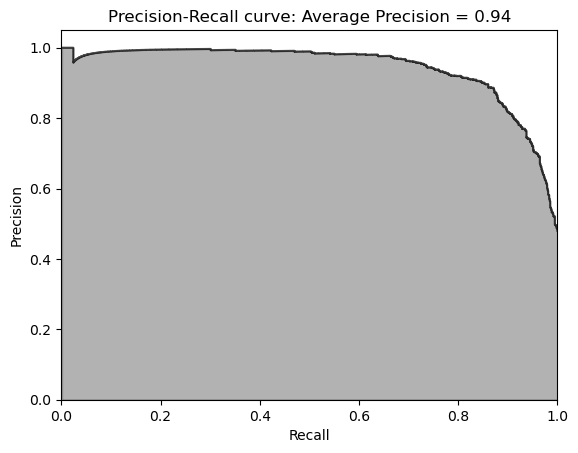

In [57]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')

precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000000            0.001042
                 0.9             0.003846            0.469792
                 0.8             0.014423            0.663542
                 0.7             0.036538            0.735417
                 0.6             0.062500            0.792708
                 0.5             0.079808            0.836458
                 0.4             0.117308            0.876042
                 0.3             0.183654            0.900000
                 0.2             0.265385            0.935417
                 0.1             0.396154            0.961458
                 0.0             0.700962            0.984375


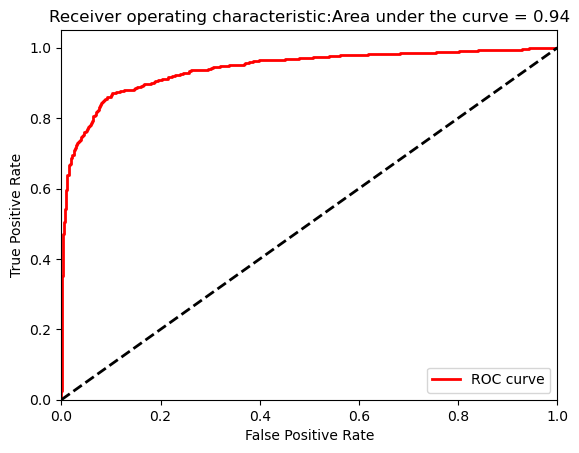

In [58]:
import numpy as np
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)

roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Random Forests

### Set the hyperparameters

In [59]:
n_estimators = 100
max_features = 'log2'
max_depth = None
min_samples_split = 5
min_samples_leaf = 2
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 42
class_weight = 'balanced'
RFC = RandomForestClassifier(n_estimators=n_estimators,
max_features=max_features, max_depth=max_depth,
min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
min_weight_fraction_leaf=min_weight_fraction_leaf,
max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,
oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,
class_weight=class_weight)

In [60]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index,columns=[0,1])
model = RFC
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier= log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print('Random Forest Log Loss: ', loglossRandomForestsClassifier)


Training Log Loss:  0.11733017083833405
CV Log Loss:  0.2350366606417554
Training Log Loss:  0.11462684285167388
CV Log Loss:  0.6681498852874366
Training Log Loss:  0.11747462178528821
CV Log Loss:  0.27451813905832995
Training Log Loss:  0.11479609585354209
CV Log Loss:  0.6219418136206081
Training Log Loss:  0.1129575629592603
CV Log Loss:  0.30702139726674355
Training Log Loss:  0.11758751051354165
CV Log Loss:  0.2571519015145824
Training Log Loss:  0.11125460264593913
CV Log Loss:  0.5234068676779688
Training Log Loss:  0.11849237158858007
CV Log Loss:  0.23244933625834568
Training Log Loss:  0.11014616484089809
CV Log Loss:  0.4083755076310661
Training Log Loss:  0.11641443613719493
CV Log Loss:  0.4084677646592479
Random Forest Log Loss:  0.39365192736160837


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.596068 0.979167
                 0.2   0.735437 0.946875
                 0.3   0.806159 0.927083
                 0.4   0.845552 0.901042
                 0.5   0.877743 0.875000
                 0.6   0.906977 0.853125
                 0.7   0.933174 0.814583
                 0.8   0.951094 0.769792
                 0.9   0.967695 0.686458
                 1.0   0.977444 0.541667


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.94')

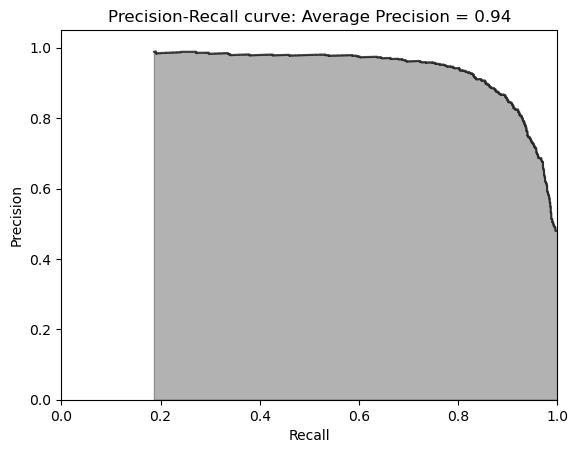

In [61]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsRandomForestsClassifier = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')

precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.001923            0.186458
                 0.9             0.011538            0.586458
                 0.8             0.022115            0.686458
                 0.7             0.036538            0.773958
                 0.6             0.054808            0.814583
                 0.5             0.080769            0.854167
                 0.4             0.112500            0.877083
                 0.3             0.151923            0.904167
                 0.2             0.206731            0.927083
                 0.1             0.314423            0.947917
                 0.0             0.624038            0.979167


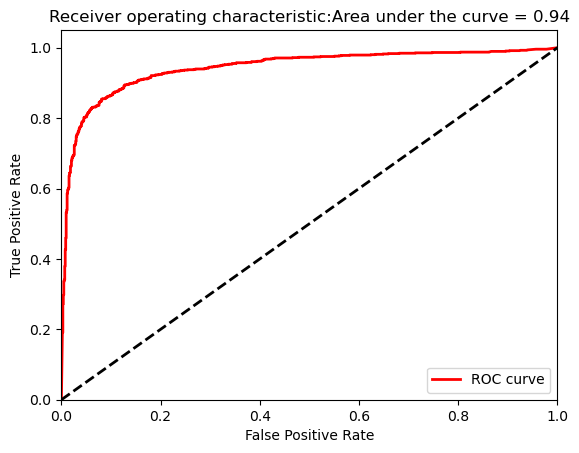

In [62]:
import numpy as np
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)

roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## XGBClassifier

In [63]:
params_xGB = {
    'nthread': 16,                # Number of CPU cores
    'learning_rate': 0.3,         # Step size shrinkage
    'gamma': 0,                   # Minimum loss reduction to make a further split
    'max_depth': 6,               # Maximum depth of trees
    'min_child_weight': 1,        # Minimum sum of instance weight (hessian) needed in a child
    'max_delta_step': 0,          # Maximum delta step we allow each tree’s weight estimation to be
    'subsample': 1.0,             # Subsample ratio of the training instances
    'colsample_bytree': 1.0,      # Subsample ratio of columns when constructing each tree
    'objective': 'binary:logistic', # Objective function
    'eval_metric': 'logloss',       # Evaluation metric
    'scale_pos_weight': 1,
    'lambda': 1,
    'seed': 42,                  # Random seed
    'verbosity': 0                # Silent mode (instead of deprecated 'silent')
}


In [64]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index,columns=['prediction'])
'''
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
'''
from sklearn.preprocessing import LabelEncoder

# Before the loop — encode the labels once
label_encoder = LabelEncoder()
y_train_encoded = pd.Series(label_encoder.fit_transform(y_train), index=y_train.index)

# Then inside the loop, use the encoded labels
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train_encoded):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train_encoded.iloc[train_index], y_train_encoded.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000,nfold=5, early_stopping_rounds=200, verbose_eval=50)
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting= log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)


[0]	train-logloss:0.51417+0.00275	test-logloss:0.53178+0.00923
[50]	train-logloss:0.06168+0.00317	test-logloss:0.35110+0.04543
[100]	train-logloss:0.02686+0.00133	test-logloss:0.39629+0.05575
[150]	train-logloss:0.01596+0.00099	test-logloss:0.43741+0.06517
[200]	train-logloss:0.01141+0.00056	test-logloss:0.46334+0.06850
[211]	train-logloss:0.01077+0.00052	test-logloss:0.46755+0.06977
Training Log Loss:  0.1813175551536509
CV Log Loss:  0.2531257065269238
[0]	train-logloss:0.51128+0.00200	test-logloss:0.53119+0.00508
[50]	train-logloss:0.05631+0.00352	test-logloss:0.35740+0.03715
[100]	train-logloss:0.02466+0.00191	test-logloss:0.41199+0.04269
[150]	train-logloss:0.01482+0.00087	test-logloss:0.45197+0.04832
[200]	train-logloss:0.01085+0.00055	test-logloss:0.47570+0.05572
[209]	train-logloss:0.01036+0.00050	test-logloss:0.47963+0.05656
Training Log Loss:  0.1891122352569993
CV Log Loss:  0.311724490329345
[0]	train-logloss:0.51205+0.00291	test-logloss:0.52744+0.00373
[50]	train-logloss:0

 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.559905 0.983333
                 0.2   0.747307 0.939583
                 0.3   0.819535 0.917708
                 0.4   0.853440 0.891667
                 0.5   0.876712 0.866667
                 0.6   0.900000 0.843750
                 0.7   0.921893 0.811458
                 0.8   0.935361 0.768750
                 0.9   0.959270 0.711458
                 1.0   0.979466 0.496875


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.94')

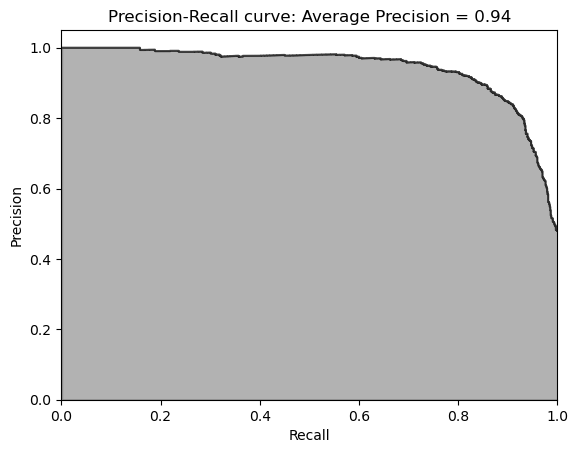

In [65]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')


precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000000            0.001042
                 0.9             0.009615            0.500000
                 0.8             0.028846            0.711458
                 0.7             0.049038            0.770833
                 0.6             0.063462            0.812500
                 0.5             0.086538            0.845833
                 0.4             0.112500            0.867708
                 0.3             0.141346            0.892708
                 0.2             0.187500            0.918750
                 0.1             0.294231            0.939583
                 0.0             0.715385            0.983333


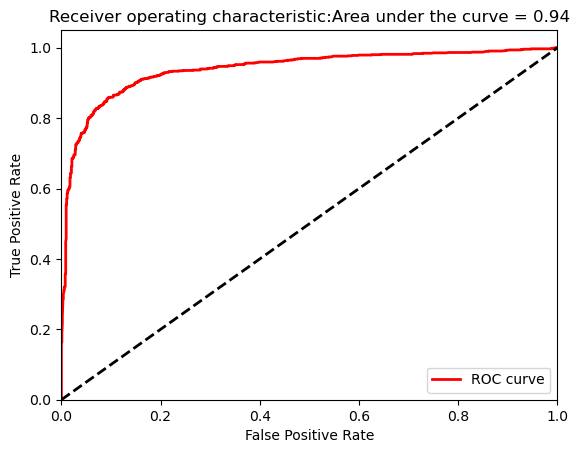

In [66]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)


roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## KNeighborsClassifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=11,          # Number of neighbors to use (odd number recommended)
    weights='uniform',      # or 'distance' (closer neighbors have more influence)
    algorithm='auto',       # Let scikit-learn choose the best between 'ball_tree', 'kd_tree', 'brute'
    leaf_size=30,           # Affects the speed of the tree-based algorithms
    p=2,                    # Power parameter for the Minkowski metric (2 = Euclidean, 1 = Manhattan)
    metric='minkowski',     # Distance metric; 'minkowski' allows flexibility with p
    n_jobs=-1               # Use all CPU cores for parallel computation
)


In [68]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])


model = knn


for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)
    
   
    prob_train = model.predict_proba(X_train_fold)
    prob_cv = model.predict_proba(X_cv_fold)

    
    
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)


loglossKNN = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
print('KNN Log Loss: ', loglossKNN)

Training Log Loss:  0.24419772565213724
CV Log Loss:  0.4000243660278427
Training Log Loss:  0.23839976930950568
CV Log Loss:  1.1536845092909613
Training Log Loss:  0.24237635256435075
CV Log Loss:  0.640409545354187
Training Log Loss:  0.24252985747509553
CV Log Loss:  0.9551285433655081
Training Log Loss:  0.2421777555969236
CV Log Loss:  0.9716970682880681
Training Log Loss:  0.2464276342566423
CV Log Loss:  0.4067921509952467
Training Log Loss:  0.23785625738121904
CV Log Loss:  1.3090405716196016
Training Log Loss:  0.24660727269424623
CV Log Loss:  0.5639503770658918
Training Log Loss:  0.23259592187363703
CV Log Loss:  1.214603558939909
Training Log Loss:  0.24406143079608167
CV Log Loss:  0.5870026773891952
KNN Log Loss:  0.8202333368336412


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.591798 0.977083
                 0.2   0.715075 0.943750
                 0.3   0.797824 0.916667
                 0.4   0.846078 0.898958
                 0.5   0.877998 0.877083
                 0.6   0.921615 0.808333
                 0.7   0.937659 0.767708
                 0.8   0.951657 0.717708
                 0.9   0.966667 0.634375
                 1.0   0.978903 0.483333


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.93')

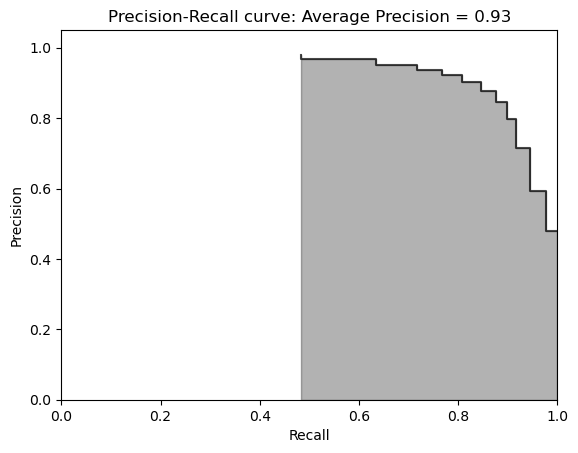

In [69]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsKNN = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')

precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.009615            0.483333
                 0.9             0.020192            0.634375
                 0.8             0.033654            0.717708
                 0.7             0.047115            0.767708
                 0.6             0.063462            0.808333
                 0.5             0.084615            0.846875
                 0.4             0.150962            0.898958
                 0.3             0.214423            0.916667
                 0.2             0.347115            0.943750
                 0.1             0.622115            0.977083
                 0.0             1.000000            1.000000


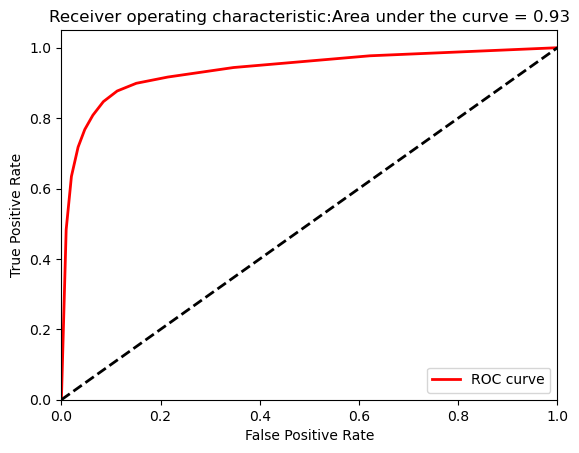

In [70]:
import numpy as np
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)

roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine Classifier 

In [71]:
from sklearn.svm import SVC

svc = SVC(
    C=1.0,                  # Regularization parameter (higher = less regularization)
    kernel='rbf',           # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid', or a callable
    degree=3,               # Degree of the polynomial kernel (used only if kernel='poly')
    gamma='scale',          # Kernel coefficient; 'scale' is usually a good default
    coef0=0.0,              # Independent term in 'poly' and 'sigmoid' kernels
    shrinking=True,         # Whether to use the shrinking heuristic
    probability=True,       # Enables probability estimates (needed for predict_proba)
    tol=1e-3,               # Tolerance for stopping criterion
    cache_size=200,         # Size of the kernel cache (in MB)
    class_weight=None,      # Set to 'balanced' to automatically adjust weights
    verbose=False,          # Set True for debug output during training
    max_iter=-1,            # No limit on iterations
    decision_function_shape='ovr',  # One-vs-Rest strategy for multi-class classification
    random_state=None       # Set for reproducibility
)

In [72]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])

# Set up SVC model (make sure probability=True for log_loss)
model = svc

# Perform K-Fold cross-validation
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    prob_train = model.predict_proba(X_train_fold)
    prob_cv = model.predict_proba(X_cv_fold)

    # Compute log loss
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

# Overall log loss on the full training set based on CV predictions
loglossSVC = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
print('SVC Log Loss: ', loglossSVC)


Training Log Loss:  0.283870463178954
CV Log Loss:  0.23156825306114917
Training Log Loss:  0.27568245815254444
CV Log Loss:  0.32241820602735516
Training Log Loss:  0.276678242346306
CV Log Loss:  0.3079922810017468
Training Log Loss:  0.2751756331164304
CV Log Loss:  0.31578678726766307
Training Log Loss:  0.2764360230539965
CV Log Loss:  0.30422293276219287
Training Log Loss:  0.2848176199756698
CV Log Loss:  0.2465025074414367
Training Log Loss:  0.2731770230835432
CV Log Loss:  0.33141901282734665
Training Log Loss:  0.2840681308502945
CV Log Loss:  0.23277820047103936
Training Log Loss:  0.2670541151460158
CV Log Loss:  0.39512885720475294
Training Log Loss:  0.2823746383735344
CV Log Loss:  0.2592603222334659
SVC Log Loss:  0.2947077360298148


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.516287 0.990625
                 0.2   0.769889 0.937500
                 0.3   0.840077 0.908333
                 0.4   0.873587 0.885417
                 0.5   0.894962 0.869792
                 0.6   0.911534 0.847917
                 0.7   0.924419 0.828125
                 0.8   0.939206 0.788542
                 0.9   0.956284 0.729167
                 1.0   0.982283 0.519792


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.95')

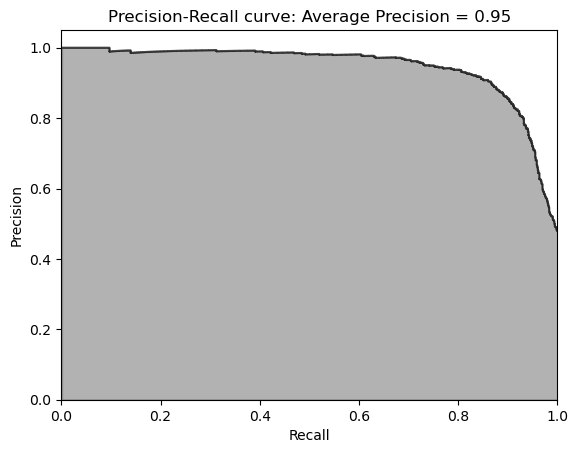

In [73]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsSVC = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')

precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000000            0.001042
                 0.9             0.009615            0.519792
                 0.8             0.031731            0.729167
                 0.7             0.047115            0.791667
                 0.6             0.064423            0.828125
                 0.5             0.075962            0.850000
                 0.4             0.096154            0.869792
                 0.3             0.118269            0.888542
                 0.2             0.159615            0.910417
                 0.1             0.258654            0.940625
                 0.0             0.872115            0.990625


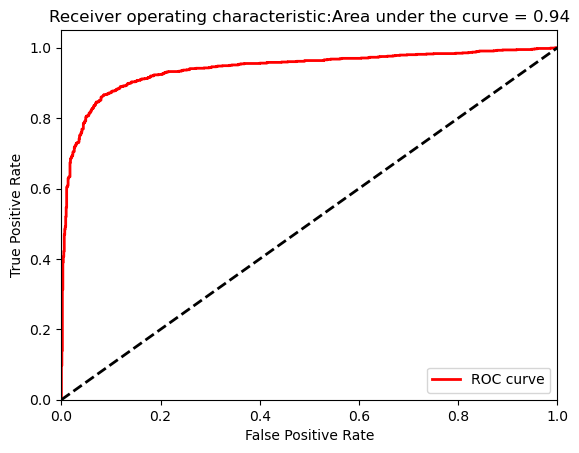

In [74]:
import numpy as np
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)

roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    criterion='entropy',        # Split quality metric: 'gini' or 'entropy'
    splitter='best',         # Split strategy: 'best' or 'random'
    max_depth=None,          # Maximum tree depth (None means nodes expand until pure or min_samples_split)
    min_samples_split=10,     # Minimum number of samples required to split a node
    min_samples_leaf=5,      # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,  # Minimum weighted fraction of total samples at a leaf
    max_features=None,       # Number of features to consider when looking for the best split
    random_state=None,       # Set for reproducibility
    max_leaf_nodes=None,     # Limit the number of leaf nodes
    min_impurity_decrease=0.0,  # A node will split if impurity decrease is at least this value
    class_weight=None,       # Set to 'balanced' to automatically adjust for class imbalance
    ccp_alpha=0.0            # Complexity parameter for Minimal Cost-Complexity Pruning
)


In [76]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])

# Set up Decision Tree model
model = dtc

# Perform K-Fold cross-validation
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    prob_train = model.predict_proba(X_train_fold)
    prob_cv = model.predict_proba(X_cv_fold)

    # Compute log loss
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

# Overall log loss on the full training set based on CV predictions
loglossDTC = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
print('Decision Tree Log Loss: ', loglossDTC)


Training Log Loss:  0.12337802211365353
CV Log Loss:  2.623354910371292
Training Log Loss:  0.11796537856459237
CV Log Loss:  3.055745817776802
Training Log Loss:  0.1150797308005251
CV Log Loss:  2.3441776546858093
Training Log Loss:  0.11542932274680122
CV Log Loss:  3.209436013632751
Training Log Loss:  0.11641694152574668
CV Log Loss:  2.878687223313176
Training Log Loss:  0.11636243536929369
CV Log Loss:  1.5743760643190676
Training Log Loss:  0.10330376230626641
CV Log Loss:  3.9166389626426987
Training Log Loss:  0.12521121508328284
CV Log Loss:  2.267743780960338
Training Log Loss:  0.10937176846839303
CV Log Loss:  3.989511729495681
Training Log Loss:  0.1132513712637366
CV Log Loss:  2.49739395832909
Decision Tree Log Loss:  2.8357066115526703


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.743830 0.910417
                 0.2   0.754569 0.903125
                 0.3   0.788626 0.866667
                 0.4   0.796296 0.851042
                 0.5   0.837526 0.832292
                 0.6   0.854031 0.816667
                 0.7   0.883117 0.779167
                 0.8   0.886336 0.763542
                 0.9   0.914894 0.716667
                 1.0   0.915094 0.707292


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.86')

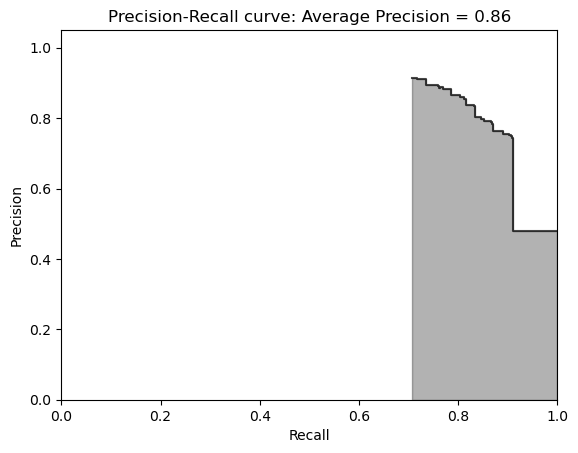

In [77]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsdtc = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')

precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.060577            0.707292
                 0.9             0.060577            0.708333
                 0.8             0.067308            0.735417
                 0.7             0.090385            0.769792
                 0.6             0.096154            0.786458
                 0.5             0.149038            0.832292
                 0.4             0.153846            0.834375
                 0.3             0.210577            0.865625
                 0.2             0.215385            0.867708
                 0.1             0.275962            0.906250
                 0.0             1.000000            1.000000


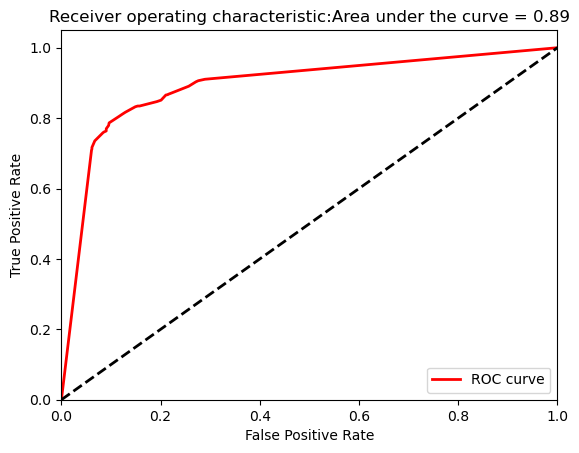

In [78]:
import numpy as np
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)

roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## GaussianNB

In [79]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(
    var_smoothing=1e-9  # Portion of the largest variance added to variances for stability
)

In [80]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])

# Set up Gaussian Naive Bayes model
model = gnb

# Perform K-Fold cross-validation
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    prob_train = model.predict_proba(X_train_fold)
    prob_cv = model.predict_proba(X_cv_fold)

    # Compute log loss
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

# Overall log loss on the full training set based on CV predictions
loglossGNB = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
print('Gaussian Naive Bayes Log Loss: ', loglossGNB)


Training Log Loss:  0.7784683619758733
CV Log Loss:  0.5107810918700514
Training Log Loss:  0.7608057073490169
CV Log Loss:  0.964586811885406
Training Log Loss:  0.7625202749890819
CV Log Loss:  0.8488761658872318
Training Log Loss:  0.7572493778662159
CV Log Loss:  0.9312793960693092
Training Log Loss:  0.776194632581106
CV Log Loss:  0.6970682454557443
Training Log Loss:  0.7672448207727578
CV Log Loss:  0.7207957615907451
Training Log Loss:  0.7502393674138749
CV Log Loss:  0.9289254540705933
Training Log Loss:  0.7886336611998623
CV Log Loss:  0.5152713758757058
Training Log Loss:  0.7587949444813358
CV Log Loss:  1.0876852435887878
Training Log Loss:  0.7877564463972518
CV Log Loss:  0.5716640391462795
Gaussian Naive Bayes Log Loss:  0.7776933651230938


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.822627 0.893750
                 0.2   0.853360 0.872917
                 0.3   0.864865 0.866667
                 0.4   0.874601 0.857292
                 0.5   0.882609 0.845833
                 0.6   0.893333 0.837500
                 0.7   0.894915 0.825000
                 0.8   0.899422 0.810417
                 0.9   0.911032 0.800000
                 1.0   0.923833 0.783333


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.94')

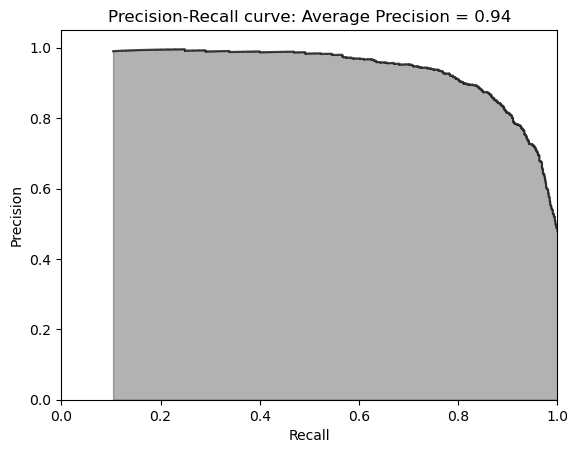

In [81]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsGNB = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')

precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000962            0.104167
                 0.9             0.061538            0.783333
                 0.8             0.073077            0.800000
                 0.7             0.084615            0.810417
                 0.6             0.089423            0.829167
                 0.5             0.094231            0.837500
                 0.4             0.103846            0.846875
                 0.3             0.113462            0.858333
                 0.2             0.127885            0.866667
                 0.1             0.140385            0.872917
                 0.0             0.177885            0.894792


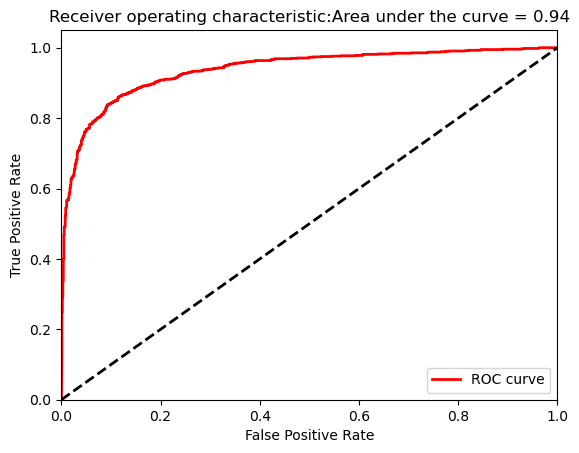

In [82]:
import numpy as np
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)

roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## LinearDiscriminantAnalysis

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(
    solver='svd',         # Solver: 'svd', 'lsqr', or 'eigen'
    shrinkage=None,       # Shrinkage parameter: None, 'auto', or float (only for 'lsqr' or 'eigen')
    priors=None,          # Class priors; if None, they are inferred from the data
    n_components=None,    # Number of components (< n_classes - 1). If None, all components are kept
    store_covariance=False,  # If True, covariance matrix is computed and stored (only for 'lsqr' and 'eigen')
    tol=1e-4              # Tolerance for rank estimation
)


In [84]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])

# Set up LDA model
model = lda

# Perform K-Fold cross-validation
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    prob_train = model.predict_proba(X_train_fold)
    prob_cv = model.predict_proba(X_cv_fold)

    # Compute log loss
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)

    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)

    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

# Overall log loss on the full training set based on CV predictions
loglossLDA = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
print('LDA Log Loss: ', loglossLDA)


Training Log Loss:  0.3118434163608226
CV Log Loss:  0.2331854155115897
Training Log Loss:  0.30349011486044775
CV Log Loss:  0.396749861474172
Training Log Loss:  0.30796425342941613
CV Log Loss:  0.3013672329055657
Training Log Loss:  0.3061617428501073
CV Log Loss:  0.3467063409290848
Training Log Loss:  0.31035871746649796
CV Log Loss:  0.2828409149746346
Training Log Loss:  0.31461345036535576
CV Log Loss:  0.23437960096659163
Training Log Loss:  0.30275660508058194
CV Log Loss:  0.3708228065320211
Training Log Loss:  0.31413117127679313
CV Log Loss:  0.24177138817299845
Training Log Loss:  0.2982462845928874
CV Log Loss:  0.44069182210393926
Training Log Loss:  0.31156520408477817
CV Log Loss:  0.31908318788564294
LDA Log Loss:  0.316759857145624


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.698485 0.960417
                 0.2   0.778553 0.930208
                 0.3   0.831094 0.902083
                 0.4   0.864837 0.886458
                 0.5   0.883721 0.870833
                 0.6   0.901001 0.843750
                 0.7   0.911525 0.815625
                 0.8   0.929455 0.782292
                 0.9   0.947439 0.732292
                 1.0   0.978188 0.607292


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.95')

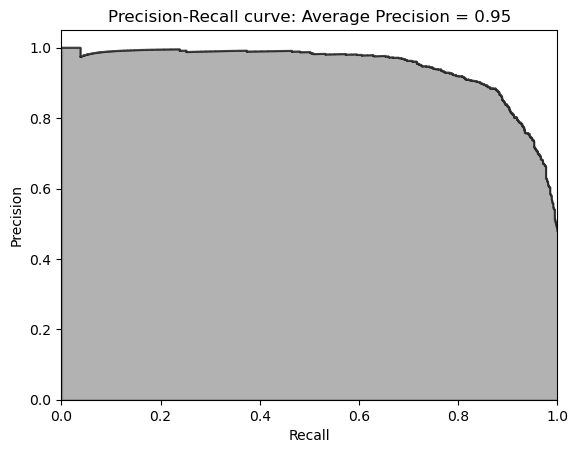

In [85]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsLDA = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')

precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000000            0.001042
                 0.9             0.012500            0.628125
                 0.8             0.037500            0.735417
                 0.7             0.056731            0.782292
                 0.6             0.075000            0.815625
                 0.5             0.086538            0.843750
                 0.4             0.105769            0.875000
                 0.3             0.130769            0.886458
                 0.2             0.170192            0.902083
                 0.1             0.247115            0.930208
                 0.0             0.382692            0.961458


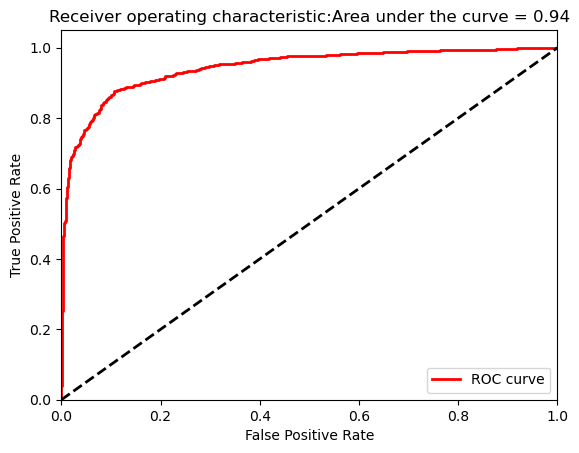

In [86]:
import numpy as np
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)

roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## LightGBM

In [87]:
params_lightGB = {
    'task': 'train',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 42,
    'verbose': -1,
    'num_threads':16
}

In [88]:
from lightgbm import early_stopping, log_evaluation

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=['prediction'])

from sklearn.preprocessing import LabelEncoder

# Before the loop — encode the labels once
label_encoder = LabelEncoder()
y_train_encoded = pd.Series(label_encoder.fit_transform(y_train), index=y_train.index)

# Then inside the loop, use the encoded labels
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train_encoded):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train_encoded.iloc[train_index], y_train_encoded.iloc[cv_index]

    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)

    gbm = lgb.train(
        params_lightGB,
        lgb_train,
        num_boost_round=2000,
        valid_sets=[lgb_eval],
        callbacks=[
            early_stopping(stopping_rounds=200),
            log_evaluation(period=100)  # Optional: prints every 100 rounds
        ]
    )

    # Predict and compute training log loss
    prob_train = gbm.predict(X_train_fold, num_iteration=gbm.best_iteration)
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)

    # Predict CV fold
    prob_cv = gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration)
    predictionsBasedOnKFolds.loc[X_cv_fold.index, 'prediction'] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)

    print('Training Log Loss:', loglossTraining)
    print('CV Log Loss:', loglossCV)

# Final log loss on all CV predictions
loglossLightGBMGradientBoosting = log_loss(y_train, predictionsBasedOnKFolds['prediction'])
print('LightGBM Gradient Boosting Log Loss:', loglossLightGBMGradientBoosting)

Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.356612
[200]	valid_0's binary_logloss: 0.269306
[300]	valid_0's binary_logloss: 0.243999
[400]	valid_0's binary_logloss: 0.237428
[500]	valid_0's binary_logloss: 0.236788
[600]	valid_0's binary_logloss: 0.238572
Early stopping, best iteration is:
[425]	valid_0's binary_logloss: 0.236335
Training Log Loss: 0.23111438840640286
CV Log Loss: 0.23633539666266465
Training until validation scores don't improve for 200 rounds
[100]	valid_0's binary_logloss: 0.39711
[200]	valid_0's binary_logloss: 0.324521
[300]	valid_0's binary_logloss: 0.307023
[400]	valid_0's binary_logloss: 0.301435
[500]	valid_0's binary_logloss: 0.299733
[600]	valid_0's binary_logloss: 0.300346
[700]	valid_0's binary_logloss: 0.300181
Early stopping, best iteration is:
[530]	valid_0's binary_logloss: 0.299447
Training Log Loss: 0.21001989100815371
CV Log Loss: 0.2994474678598456
Training until validation scores don't improve fo

 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.549884 0.987500
                 0.2   0.754780 0.945833
                 0.3   0.825397 0.920833
                 0.4   0.866667 0.893750
                 0.5   0.886170 0.867708
                 0.6   0.907554 0.838542
                 0.7   0.931490 0.807292
                 0.8   0.949742 0.767708
                 0.9   0.967096 0.704167
                 1.0   0.983547 0.560417


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.95')

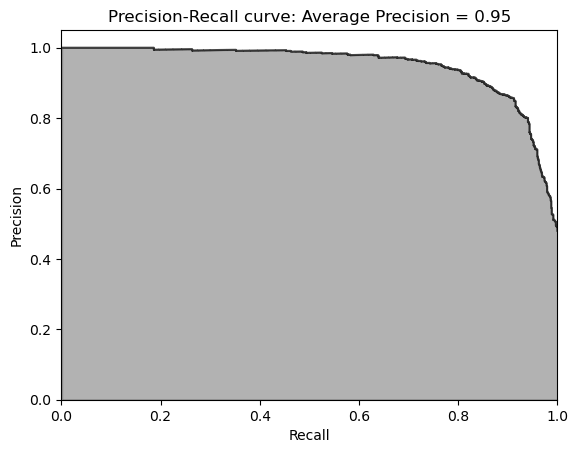

In [89]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')


precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000000            0.001042
                 0.9             0.008654            0.576042
                 0.8             0.022115            0.707292
                 0.7             0.038462            0.767708
                 0.6             0.058654            0.807292
                 0.5             0.078846            0.840625
                 0.4             0.102885            0.868750
                 0.3             0.126923            0.894792
                 0.2             0.185577            0.920833
                 0.1             0.284615            0.945833
                 0.0             0.750962            0.987500


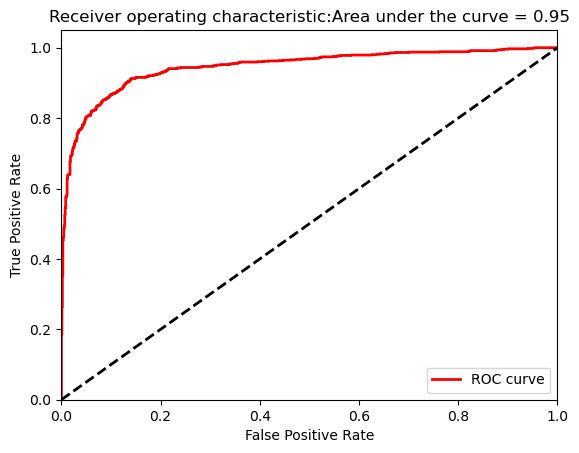

In [90]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)


roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## CatBoostClassifier

In [91]:
cat=CatBoostClassifier(
        iterations=2000,
        depth=4,
        learning_rate=0.01,
        loss_function='Logloss',
        eval_metric='Logloss',
        verbose=100,
        early_stopping_rounds=200,
        random_seed= 42,
        thread_count=16
    )

In [92]:
from catboost import CatBoostClassifier, Pool
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    # Prepare Pools
    train_pool = Pool(X_train_fold, y_train_fold)
    cv_pool = Pool(X_cv_fold, y_cv_fold)

    # Set up CatBoost parameters
    model = cat

    # Train the model
    model.fit(train_pool, eval_set=cv_pool, use_best_model=True)

    # Predict and compute log loss on training fold
    prob_train = model.predict_proba(X_train_fold)[:, 1]
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)

    # Predict and compute log loss on validation fold
    prob_cv = model.predict_proba(X_cv_fold)[:, 1]
    predictionsBasedOnKFolds.loc[X_cv_fold.index, 'prediction'] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)

    print('Training Log Loss:', loglossTraining)
    print('CV Log Loss:', loglossCV)

# Final log loss on all out-of-fold predictions
loglossCatBoost = log_loss(y_train, predictionsBasedOnKFolds['prediction'])
print('CatBoost Log Loss:', loglossCatBoost)


0:	learn: 0.6835341	test: 0.6825120	best: 0.6825120 (0)	total: 5.25ms	remaining: 10.5s
100:	learn: 0.3414958	test: 0.3003638	best: 0.3003638 (100)	total: 518ms	remaining: 9.74s
200:	learn: 0.2868189	test: 0.2447382	best: 0.2447382 (200)	total: 1.06s	remaining: 9.49s
300:	learn: 0.2694933	test: 0.2336806	best: 0.2336806 (300)	total: 1.59s	remaining: 8.96s
400:	learn: 0.2593679	test: 0.2316451	best: 0.2314029 (378)	total: 2.05s	remaining: 8.17s
500:	learn: 0.2517162	test: 0.2315779	best: 0.2314029 (378)	total: 2.5s	remaining: 7.49s
600:	learn: 0.2449159	test: 0.2314909	best: 0.2309053 (534)	total: 2.89s	remaining: 6.73s
700:	learn: 0.2379598	test: 0.2327394	best: 0.2309053 (534)	total: 3.31s	remaining: 6.14s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.2309053145
bestIteration = 534

Shrink model to first 535 iterations.
Training Log Loss: 0.24936076344982933
CV Log Loss: 0.2309053145066827
0:	learn: 0.6832226	test: 0.6845090	best: 0.6845090 (0)	total: 3.35ms	rema

 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.561684 0.986458
                 0.2   0.759567 0.951042
                 0.3   0.822984 0.925000
                 0.4   0.872856 0.901042
                 0.5   0.889714 0.873958
                 0.6   0.909699 0.850000
                 0.7   0.929845 0.814583
                 0.8   0.955013 0.773958
                 0.9   0.972662 0.704167
                 1.0   0.985375 0.561458


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.96')

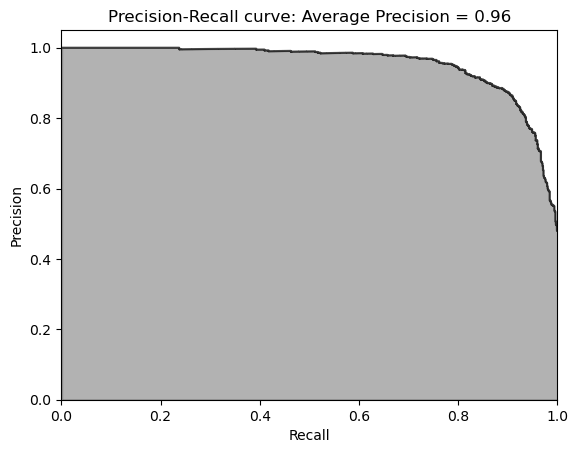

In [93]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldscatboost = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')


precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000000            0.001042
                 0.9             0.007692            0.587500
                 0.8             0.018269            0.716667
                 0.7             0.033654            0.779167
                 0.6             0.058654            0.814583
                 0.5             0.078846            0.850000
                 0.4             0.100000            0.877083
                 0.3             0.121154            0.902083
                 0.2             0.184615            0.925000
                 0.1             0.277885            0.952083
                 0.0             0.714423            0.986458


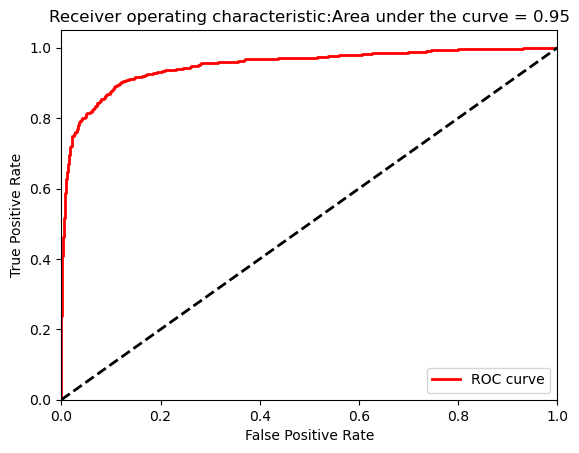

In [94]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)


roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Multilayer perceptrons (MLPs)

In [95]:
mlp = MLPClassifier(hidden_layer_sizes = [100],     # Tuple: Number of neurons per hidden layer
    activation='relu',             # {'identity', 'logistic', 'tanh', 'relu'}
    solver='adam',                 # {'lbfgs', 'sgd', 'adam'} — Optimization algorithm
    alpha=0.0001,                  # L2 regularization (penalty) term
    batch_size='auto',            # Size of minibatches for stochastic optimizers
    learning_rate='constant',     # {'constant', 'invscaling', 'adaptive'}
    learning_rate_init=0.001,     # Initial learning rate
    power_t=0.5,                   # Exponent for 'invscaling' learning rate
    max_iter=200,                  # Maximum number of training iterations
    shuffle=True,                 # Whether to shuffle samples each epoch
    random_state=None,            # Seed for reproducibility
    tol=1e-4,                      # Tolerance for stopping criteria
    verbose=False,                # Print progress to stdout
    warm_start=False,            # Reuse solution from previous fit
    momentum=0.9,                 # Momentum for gradient descent update
    nesterovs_momentum=True,     # Use Nesterov’s momentum
    early_stopping=False,        # Stop early if validation score doesn't improve
    validation_fraction=0.1,     # Proportion of training data for validation if early_stopping is True
    beta_1=0.9,                   # β₁ parameter for Adam optimizer
    beta_2=0.999,                 # β₂ parameter for Adam optimizer
    epsilon=1e-8,                 # Stability term for Adam
    n_iter_no_change=10,         # Number of epochs with no improvement to wait before stopping
    max_fun=15000                # Only for solver='lbfgs': maximum number of function calls
)


In [96]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])


model = mlp

# Perform K-Fold cross-validation
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities for training and validation sets
    prob_train = model.predict_proba(X_train_fold)
    prob_cv = model.predict_proba(X_cv_fold)

    # Compute log loss
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)

loglossMLP = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
print('MLP Log Loss: ', loglossMLP)




Training Log Loss:  0.26375000867451776
CV Log Loss:  0.22244195900996147
Training Log Loss:  0.25636929282646526
CV Log Loss:  0.30316724276861456
Training Log Loss:  0.2542667269841099
CV Log Loss:  0.31766427731355223
Training Log Loss:  0.2572625659353003
CV Log Loss:  0.3000789894609481
Training Log Loss:  0.2598397764586546
CV Log Loss:  0.28338500465143013
Training Log Loss:  0.2660684964404405
CV Log Loss:  0.21887230784314518
Training Log Loss:  0.2512286179967021
CV Log Loss:  0.3271989526101374
Training Log Loss:  0.2610773779347541
CV Log Loss:  0.2313696206605603
Training Log Loss:  0.2414857884625886
CV Log Loss:  0.39879741703212096
Training Log Loss:  0.26419819147552503
CV Log Loss:  0.2407329820154925
MLP Log Loss:  0.28437087533659633


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.583951 0.985417
                 0.2   0.752073 0.944792
                 0.3   0.829084 0.914583
                 0.4   0.866801 0.894792
                 0.5   0.895248 0.863542
                 0.6   0.913832 0.839583
                 0.7   0.934132 0.812500
                 0.8   0.949936 0.770833
                 0.9   0.965616 0.702083
                 1.0   0.983755 0.567708


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.95')

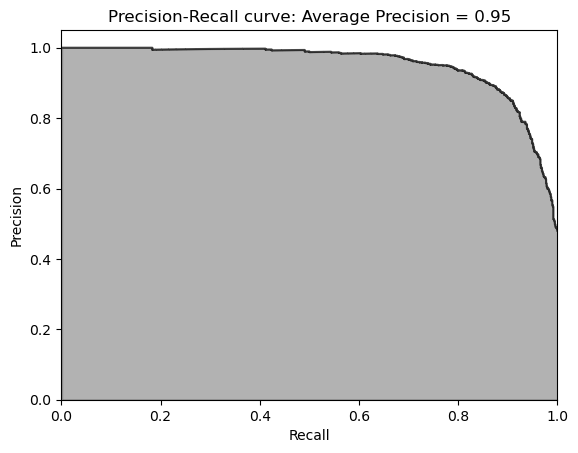

In [97]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldsMLP = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')

precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000000            0.001042
                 0.9             0.008654            0.603125
                 0.8             0.023077            0.704167
                 0.7             0.037500            0.777083
                 0.6             0.053846            0.812500
                 0.5             0.075000            0.839583
                 0.4             0.093269            0.864583
                 0.3             0.128846            0.894792
                 0.2             0.174038            0.915625
                 0.1             0.292308            0.944792
                 0.0             0.648077            0.986458


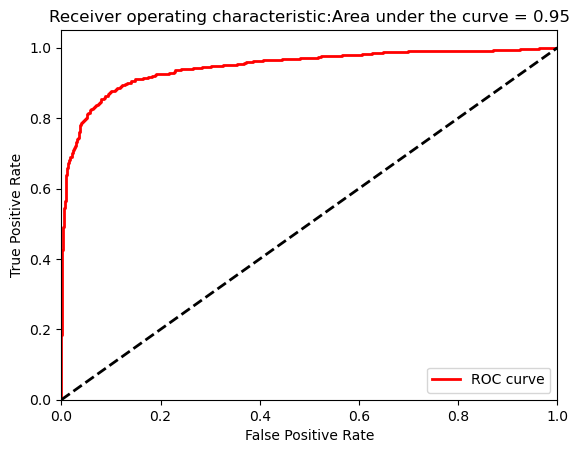

In [98]:
import numpy as np
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)

roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})


roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10


roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')


roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']


print(roc_df_filtered.to_string(index=False))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Test Set Evaluation 

In [102]:
models= [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),LinearDiscriminantAnalysis(),GaussianNB(),SVC(),RandomForestClassifier(), CatBoostClassifier(), LGBMClassifier(), XGBClassifier(), MLPClassifier()]

In [107]:
seed = 42
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CABC', CatBoostClassifier()))
models.append(('LGBMC', LGBMClassifier()))
models.append(('XGBC', XGBClassifier()))
models.append(('MLPC', MLPClassifier()))

In [108]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Fit the label encoder on y_train
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Step 2: Transform both y_train and y_test using the fitted encoder
y_train_encoded = pd.Series(label_encoder.transform(y_train), index=y_train.index)
y_test_encoded = pd.Series(label_encoder.transform(y_test), index=y_test.index)

In [109]:
results = []
names = []
scoring = 'accuracy' 
import warnings
warnings.filterwarnings("ignore") 
for name, model in models:
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test, y_test_encoded, scoring=scoring)
    results.append(cv_results) 
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.854000 (0.010198)
LDA: 0.870000 (0.012649)
KNN: 0.834000 (0.018547)
DTC: 0.818000 (0.021354)
GNB: 0.862000 (0.020396)
SVM: 0.864000 (0.021541)
RFC: 0.870000 (0.020976)
Learning rate set to 0.006966
0:	learn: 0.6865460	total: 5.58ms	remaining: 5.58s
1:	learn: 0.6813451	total: 10.1ms	remaining: 5.04s
2:	learn: 0.6761475	total: 14.6ms	remaining: 4.85s
3:	learn: 0.6705029	total: 19.1ms	remaining: 4.75s
4:	learn: 0.6644645	total: 23.8ms	remaining: 4.73s
5:	learn: 0.6585479	total: 28.8ms	remaining: 4.78s
6:	learn: 0.6520329	total: 33.3ms	remaining: 4.72s
7:	learn: 0.6468377	total: 38.1ms	remaining: 4.72s
8:	learn: 0.6408917	total: 42.5ms	remaining: 4.68s
9:	learn: 0.6355917	total: 46.9ms	remaining: 4.64s
10:	learn: 0.6305393	total: 52.3ms	remaining: 4.7s
11:	learn: 0.6250448	total: 59.3ms	remaining: 4.88s
12:	learn: 0.6199192	total: 65.5ms	remaining: 4.97s
13:	learn: 0.6140030	total: 73.8ms	remaining: 5.2s
14:	learn: 0.6083986	total: 78.7ms	remaining: 5.17s
15:	learn: 0.6034717	total: 

In [110]:
predictionsTestSetLogisticRegression = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = log_loss(y_test, predictionsTestSetLogisticRegression)

In [111]:
predictionsTestSetRandomForests = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = log_loss(y_test, predictionsTestSetRandomForests)

In [112]:
predictionsTestSetXGBoostGradientBoosting = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] =  bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [113]:
predictionsTestSetLightGBMGradientBoosting = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [114]:
predictionsTestSetSVC = pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])
predictionsTestSetSVC.loc[:,'prediction']= svc.predict_proba(X_test)[:, 1]
logLossTestSetSVC = log_loss(y_test, predictionsTestSetSVC)


In [115]:
predictionsTestSetDTC = pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])
predictionsTestSetDTC.loc[:,'prediction'] = dtc.predict_proba(X_test)[:, 1]
logLossTestSetDTC = log_loss(y_test, predictionsTestSetDTC)


In [116]:
predictionsTestSetLDA = pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])
predictionsTestSetLDA.loc[:,'prediction'] = lda.predict_proba(X_test)[:, 1]
logLossTestSetLDA = log_loss(y_test, predictionsTestSetLDA)


In [117]:
predictionsTestSetKNN = pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])
predictionsTestSetKNN.loc[:,'prediction'] = knn.predict_proba(X_test)[:, 1]
logLossTestSetKNN = log_loss(y_test, predictionsTestSetKNN)

In [118]:
predictionsTestSetGNB = pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])
predictionsTestSetGNB.loc[:,'prediction'] = gnb.predict_proba(X_test)[:, 1]
logLossTestSetGNB = log_loss(y_test, predictionsTestSetGNB)

In [119]:
# Predict on the test set using the trained CatBoost model
predictionsTestSetCatBoosting = pd.DataFrame(index=y_test.index, columns=['prediction'])
predictionsTestSetCatBoosting['prediction'] = cat.predict_proba(X_test)[:, 1]
logLossTestSetCatBoosting = log_loss(y_test, predictionsTestSetCatBoosting)

In [120]:
predictionsTestSetMLP = pd.DataFrame(data=[], index=y_test.index, columns=['prediction'])
predictionsTestSetMLP.loc[:,'prediction'] = mlp.predict_proba(X_test)[:, 1]
logLossTestSetMLP = log_loss(y_test, predictionsTestSetMLP)

In [121]:
print("Log Loss of Logistic Regression on Test Set: ", logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", logLossTestSetRandomForests)
print("Log Loss of Support Vector Classifier on Test Set:", logLossTestSetSVC)
print("Log Loss of K-Nearest Neighbors on Test Set:", logLossTestSetKNN)
print("Log Loss of Gaussian Naive Bayes on Test Set:", logLossTestSetGNB)
print("Log Loss of Linear Discriminant Analysis on Test Set:", logLossTestSetLDA)
print("Log Loss of Decision Tree Classifier on Test Set:", logLossTestSetDTC)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", logLossTestSetLightGBMGradientBoosting)
print('Log Loss of CatBoost on Test Se:', logLossTestSetCatBoosting)
print("Log Loss of MLP on Test Set:", logLossTestSetMLP)

Log Loss of Logistic Regression on Test Set:  0.3190235091927635
Log Loss of Random Forests on Test Set:  0.2995092412354205
Log Loss of Support Vector Classifier on Test Set: 0.28918250123582223
Log Loss of K-Nearest Neighbors on Test Set: 0.6992188658568161
Log Loss of Gaussian Naive Bayes on Test Set: 0.8743513226668479
Log Loss of Linear Discriminant Analysis on Test Set: 0.38560019311828897
Log Loss of Decision Tree Classifier on Test Set: 3.0911678827235862
Log Loss of XGBoost Gradient Boosting on Test Set:  0.3096356432211668
Log Loss of LightGBM Gradient Boosting on Test Set:  0.29059145945112874
Log Loss of CatBoost on Test Se: 0.2893843969844215
Log Loss of MLP on Test Set: 0.28104077999834537


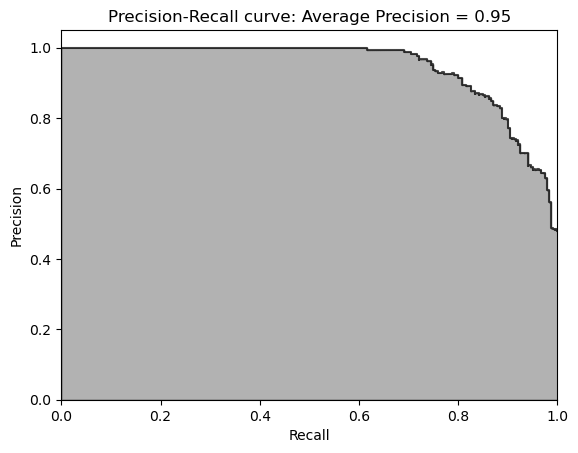

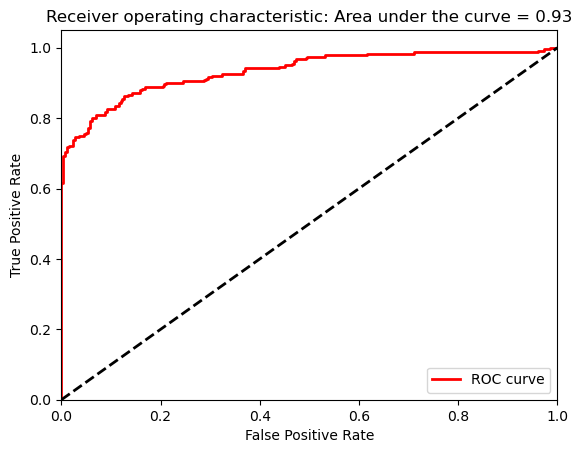

In [122]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded,predictionsTestSetLogisticRegression)
average_precision = average_precision_score(y_test_encoded,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(y_test_encoded,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

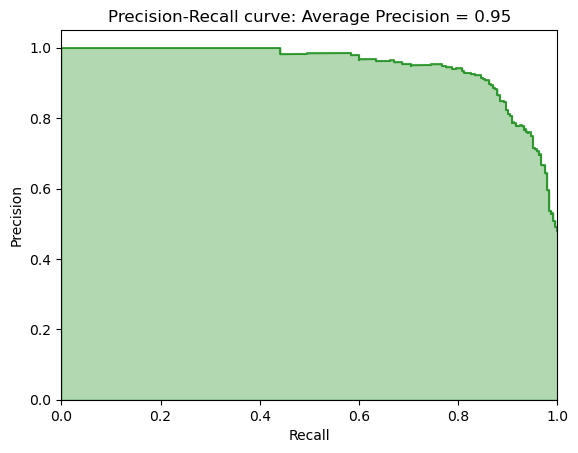

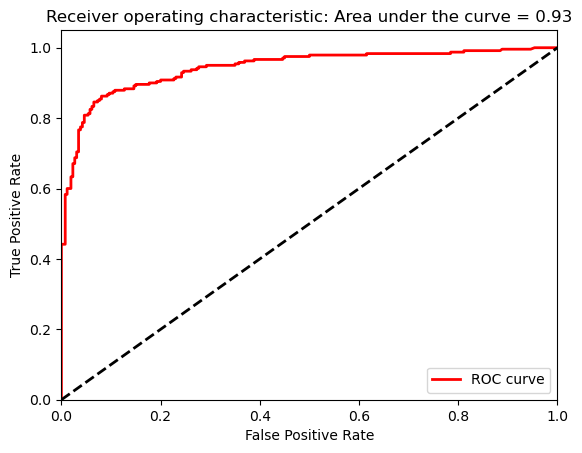

In [123]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetRandomForests)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetRandomForests)

plt.step(recall, precision, color='g', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetRandomForests)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

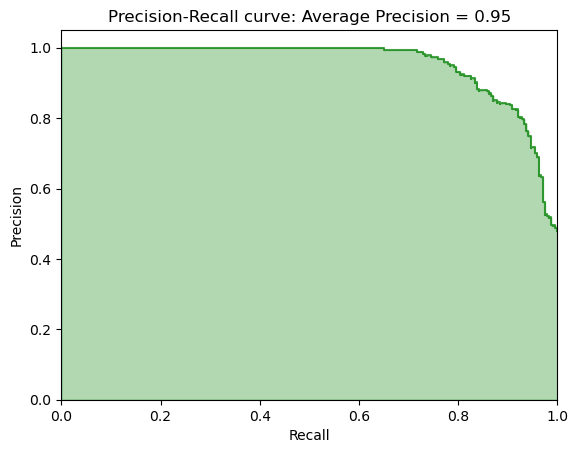

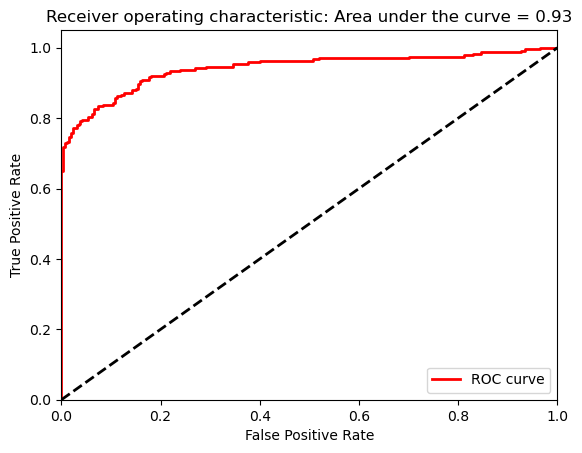

In [124]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetSVC)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetSVC)

plt.step(recall, precision, color='g', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetSVC)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

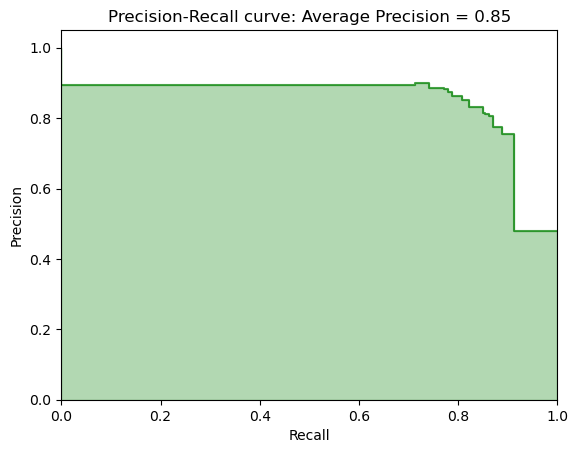

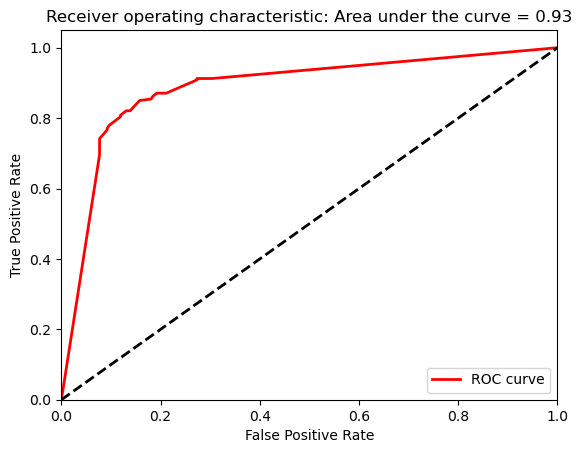

In [125]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetDTC)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetDTC)

plt.step(recall, precision, color='g', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetDTC)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()


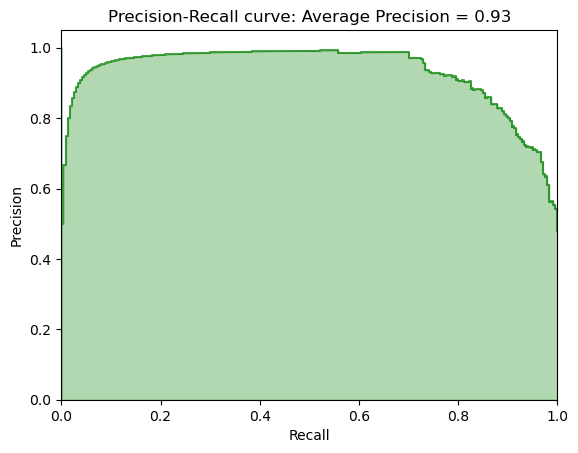

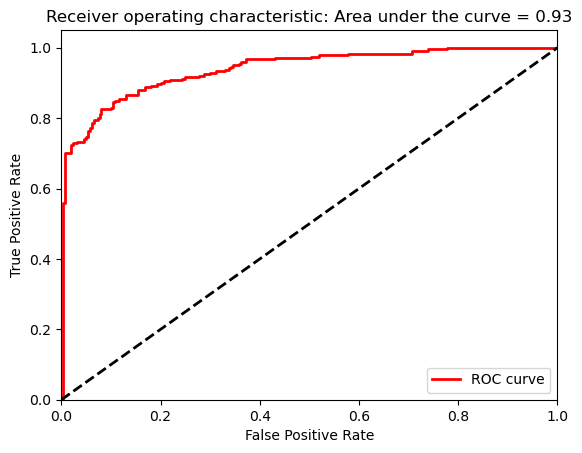

In [126]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetLDA)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetLDA)

plt.step(recall, precision, color='g', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetLDA)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

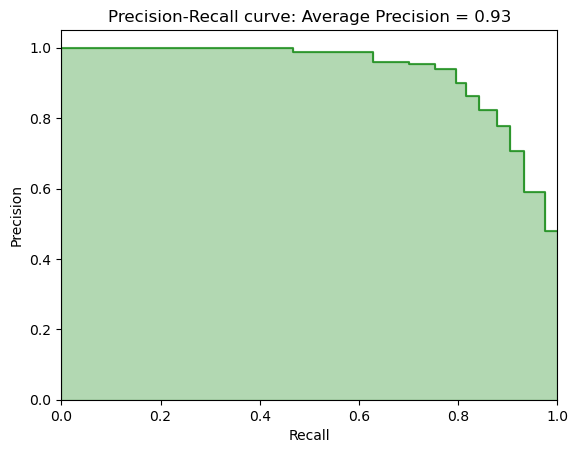

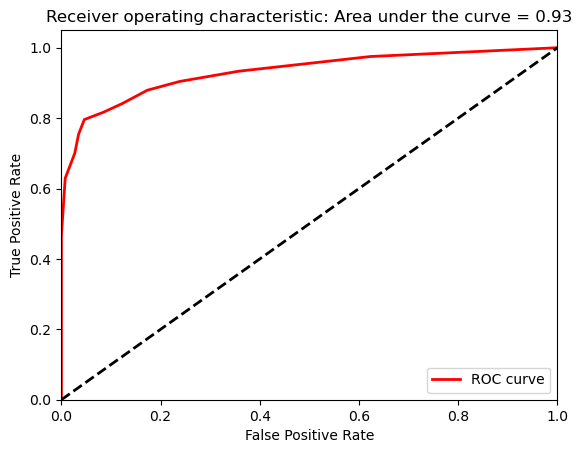

In [127]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetKNN)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetKNN)

plt.step(recall, precision, color='g', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetKNN)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()


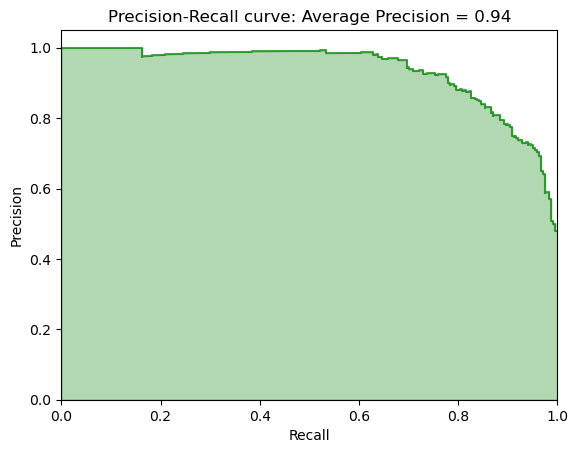

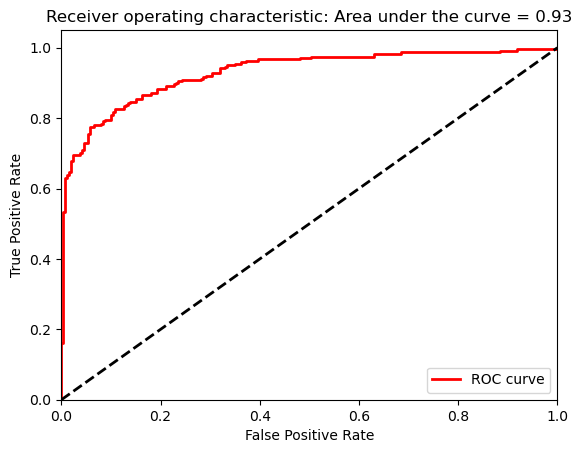

In [128]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetGNB)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetGNB)

plt.step(recall, precision, color='g', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetGNB)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()


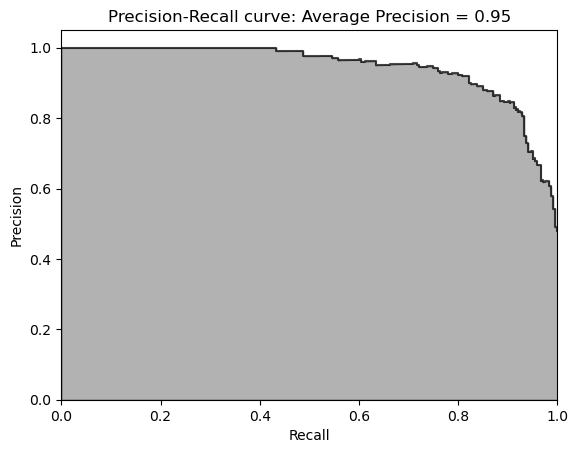

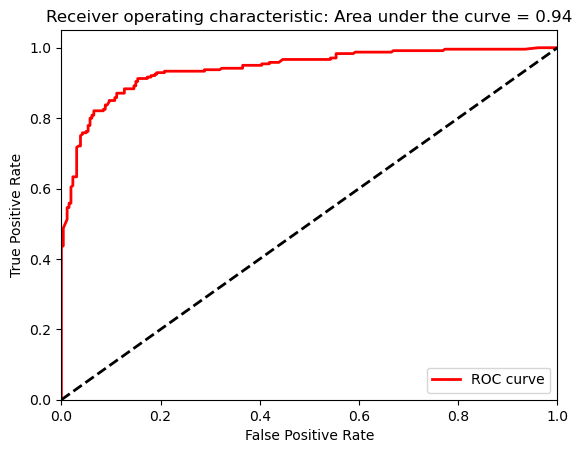

In [129]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded,predictionsTestSetXGBoostGradientBoosting)
average_precision = average_precision_score(y_test_encoded,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(y_test_encoded,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

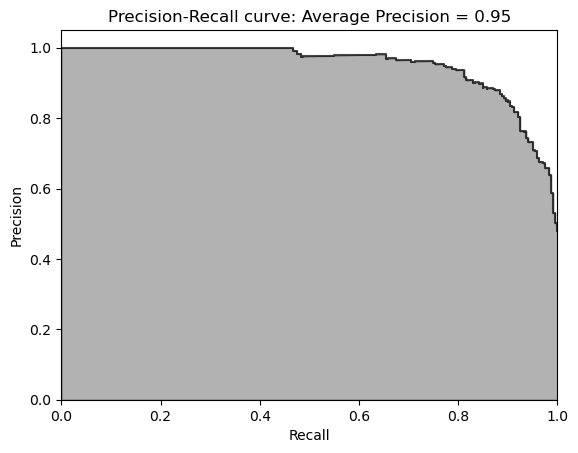

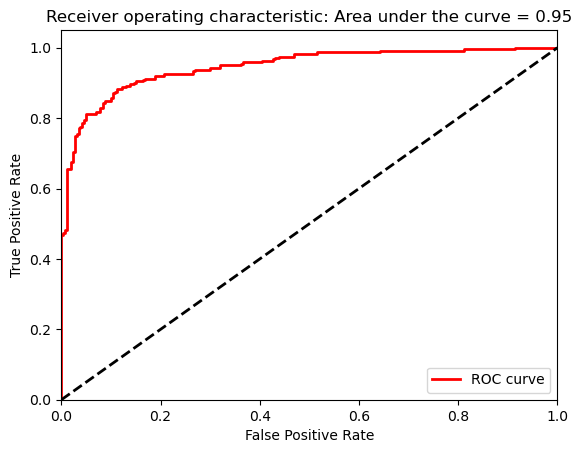

In [130]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded,predictionsTestSetLightGBMGradientBoosting)
average_precision = average_precision_score(y_test_encoded,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(y_test_encoded,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

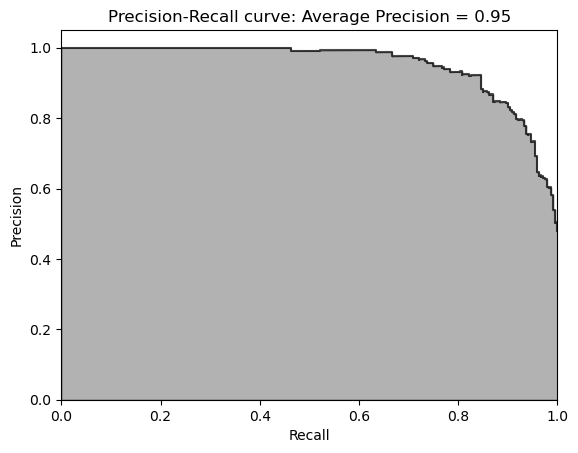

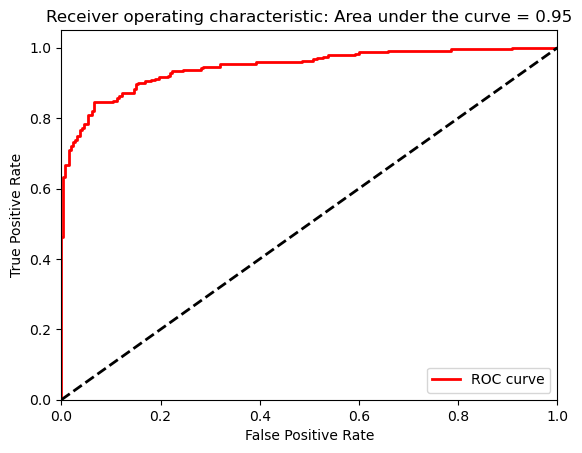

In [131]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetCatBoosting)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetCatBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetCatBoosting)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

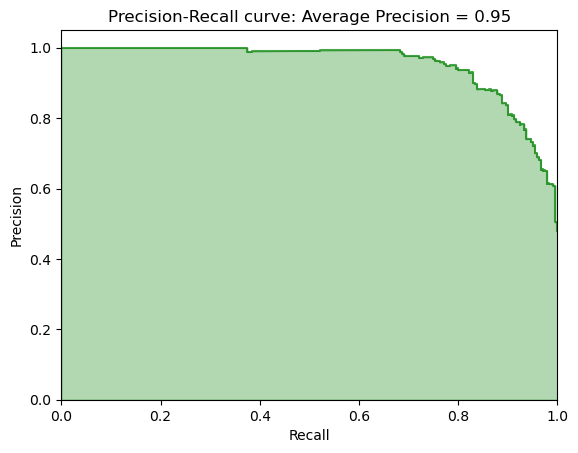

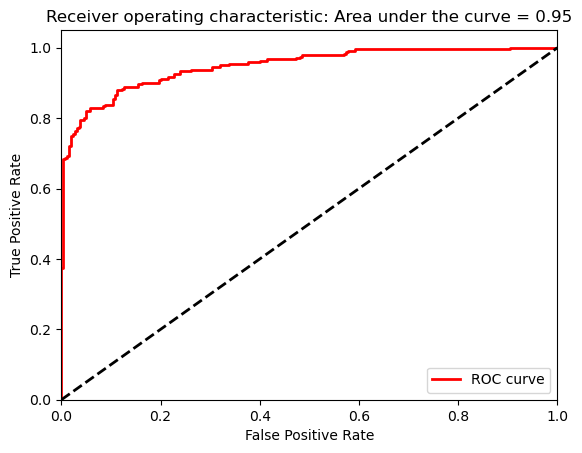

In [140]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetMLP)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetMLP)

plt.step(recall, precision, color='g', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetMLP)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Ensemble

In [141]:

predictionsBasedOnKFoldsEightModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsEightModels = predictionsBasedOnKFoldsEightModels.join(predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), how='left').join(predictionsBasedOnKFoldsRandomForestsClassifier['prediction'] .astype(float),how='left',rsuffix="2").join(
    predictionsBasedOnKFoldsKNN['prediction'].astype(float), how='left',rsuffix="3").join(predictionsBasedOnKFoldsSVC['prediction'].astype(float), how='left',rsuffix="4").join(
    predictionsBasedOnKFoldsdtc['prediction'].astype(float), how='left',rsuffix="5").join(predictionsBasedOnKFoldsGNB['prediction'].astype(float), how='left',rsuffix="6").join(
    predictionsBasedOnKFoldsLDA['prediction'].astype(float), how='left',rsuffix="7").join(predictionsBasedOnKFoldsMLP['prediction'].astype(float), how='left',rsuffix="8")
predictionsBasedOnKFoldsEightModels.columns = ['predsLR','predsRF','predsKNN','predsSVC','predsdtc','predsGNB','predsLDA','predsMLP']

# predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
# predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
#     predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
#     how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
#     .astype(float),how='left',rsuffix="2").join( \
#     predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
#     how='left',rsuffix="3").join( \
#     predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
#     how='left',rsuffix="4")
# predictionsBasedOnKFoldsFourModels.columns = \
#     ['predsLR','predsRF','predsXGB','predsLightGBM']

### Training the ensemble 

In [148]:
X_trainWithPredictions = X_train.merge(predictionsBasedOnKFoldsEightModels, left_index=True,right_index=True)

In [150]:
cat_ensemble_model = CatBoostClassifier(
        iterations=2000,
        early_stopping_rounds=200,
        eval_metric='Logloss',
        verbose=0,  
        random_seed=42
    )

In [151]:
cat_ensemble_model .fit(X_trainWithPredictions, y_train_encoded)

In [155]:
from sklearn.metrics import accuracy_score

y_train_preds = cat_ensemble_model.predict(X_trainWithPredictions)

accuracy = accuracy_score(y_train_encoded, y_train_preds)
print(f"Ensemble Model Accuracy (Train Set): {accuracy * 100:.2f}%")

Ensemble Model Accuracy (Train Set): 96.50%


In [156]:
from catboost import CatBoostClassifier, Pool
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_trainWithPredictions)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_trainWithPredictions.iloc[train_index, :], X_trainWithPredictions.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    # Prepare Pools
    train_pool = Pool(X_train_fold, y_train_fold)
    cv_pool = Pool(X_cv_fold, y_cv_fold)

    # Set up CatBoost parameters
    model = cat_ensemble_model

    # Train the model
    model.fit(train_pool, eval_set=cv_pool, use_best_model=True)

    # Predict and compute log loss on training fold
    prob_train = model.predict_proba(X_train_fold)[:, 1]
    loglossTraining = log_loss(y_train_fold, prob_train)
    trainingScores.append(loglossTraining)

    # Predict and compute log loss on validation fold
    prob_cv = model.predict_proba(X_cv_fold)[:, 1]
    predictionsBasedOnKFolds.loc[X_cv_fold.index, 'prediction'] = prob_cv
    loglossCV = log_loss(y_cv_fold, prob_cv)
    cvScores.append(loglossCV)

    print('Training Log Loss:', loglossTraining)
    print('CV Log Loss:', loglossCV)

# Final log loss on all out-of-fold predictions
loglossCatBoostensemble = log_loss(y_train, predictionsBasedOnKFolds['prediction'])
print('CatBoostensemble Log Loss:', loglossCatBoostensemble)


Training Log Loss: 0.231683322616318
CV Log Loss: 0.23309513226601986
Training Log Loss: 0.10091386559085626
CV Log Loss: 0.2949844207698913
Training Log Loss: 0.2315119483867835
CV Log Loss: 0.28570716608427804
Training Log Loss: 0.23323338966621784
CV Log Loss: 0.30491129838523734
Training Log Loss: 0.13784677772486298
CV Log Loss: 0.2794728254670686
Training Log Loss: 0.097739716494598
CV Log Loss: 0.20936572452872568
Training Log Loss: 0.25667413041280995
CV Log Loss: 0.33197707101055796
Training Log Loss: 0.0751280634822556
CV Log Loss: 0.2021817072617079
Training Log Loss: 0.24768756822340224
CV Log Loss: 0.3956339953782283
Training Log Loss: 0.14361223684895352
CV Log Loss: 0.2377777341909971
CatBoostensemble Log Loss: 0.2775107075342712


 Threshold (rounded)  Precision   Recall
                 0.0   0.480000 1.000000
                 0.1   0.578947 0.985417
                 0.2   0.771990 0.941667
                 0.3   0.843810 0.922917
                 0.4   0.877016 0.906250
                 0.5   0.889947 0.876042
                 0.6   0.908175 0.844792
                 0.7   0.925708 0.817708
                 0.8   0.950943 0.787500
                 0.9   0.966527 0.721875
                 1.0   0.983547 0.560417


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.95')

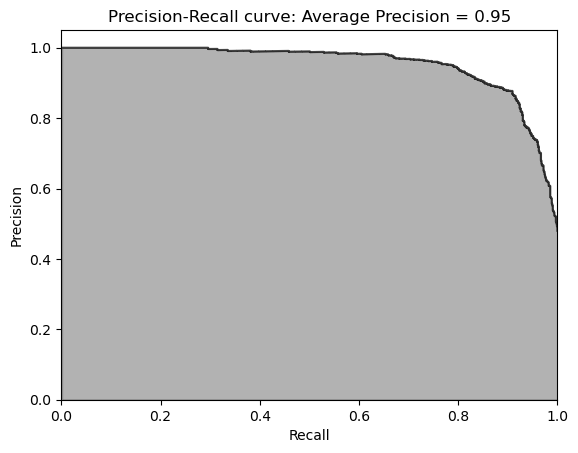

In [157]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel', 'prediction']
predictionsBasedOnKFoldscatboostensemble = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'], pos_label='Ürgüp Sivrisi')


precision = precision[:-1]
recall = recall[:-1]

# Create DataFrame
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})

# Round thresholds to nearest 0.1
pr_df['ThresholdRounded'] = np.round(pr_df['Threshold'].astype(float) * 10) / 10

# Drop duplicates to get only one entry per 0.1 threshold
pr_df_filtered = pr_df.drop_duplicates(subset='ThresholdRounded')

# Rearranged and renamed columns for clarity
pr_df_filtered = pr_df_filtered[['ThresholdRounded', 'Precision', 'Recall']]
pr_df_filtered.columns = ['Threshold (rounded)', 'Precision', 'Recall']

# Print the result
print(pr_df_filtered.to_string(index=False))

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))




 Threshold (rounded)  False Positive Rate  True Positive Rate
                 inf             0.000000            0.000000
                 1.0             0.000000            0.001042
                 0.9             0.008654            0.595833
                 0.8             0.024038            0.721875
                 0.7             0.037500            0.788542
                 0.6             0.061538            0.817708
                 0.5             0.079808            0.844792
                 0.4             0.100000            0.878125
                 0.3             0.117308            0.909375
                 0.2             0.163462            0.922917
                 0.1             0.259615            0.941667
                 0.0             0.670192            0.985417


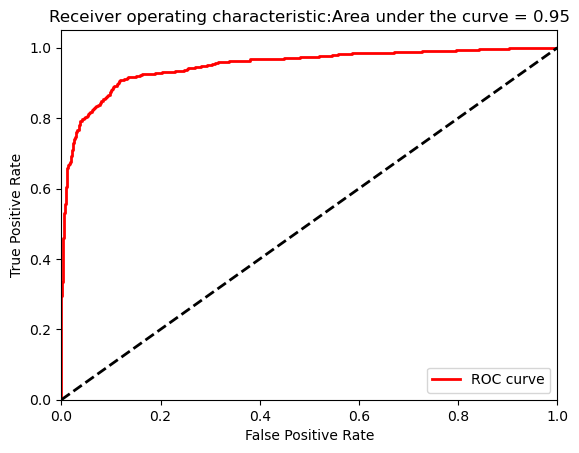

In [158]:

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'], pos_label='Ürgüp Sivrisi')
areaUnderROC = auc(fpr, tpr)


roc_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr
})

# Ensure thresholds are float and round to nearest 0.1
roc_df['ThresholdRounded'] = np.round(roc_df['Threshold'].astype(float) * 10) / 10

# Drop duplicate rounded thresholds
roc_df_filtered = roc_df.drop_duplicates(subset='ThresholdRounded')

# Select and rename columns for display
roc_df_filtered = roc_df_filtered[['ThresholdRounded', 'FPR', 'TPR']]
roc_df_filtered.columns = ['Threshold (rounded)', 'False Positive Rate', 'True Positive Rate']

# Print the table
print(roc_df_filtered.to_string(index=False))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic:Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Testing the ensemble

In [162]:
cat_ensemble_model .fit(X_test, y_test_encoded)

In [165]:
from sklearn.metrics import accuracy_score

y_test_preds = cat_ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_test_preds)
print(f"Ensemble Model Accuracy (Test Set): {accuracy * 100:.2f}%")

Ensemble Model Accuracy (Test Set): 99.00%


In [170]:
predictionsTestSetCatBoostingensemble = pd.DataFrame(index=y_test.index, columns=['prediction'])
predictionsTestSetCatBoostingensemble['prediction'] = cat_ensemble_model.predict_proba(X_test)[:, 1]
logLossTestSetCatBoostingensemble = log_loss(y_test, predictionsTestSetCatBoostingensemble)

In [171]:

print('Log Loss of CatBoost ensamble on Test Set:', logLossTestSetCatBoostingensemble)

Log Loss of CatBoost ensamble on Test Set: 0.09375129714633697


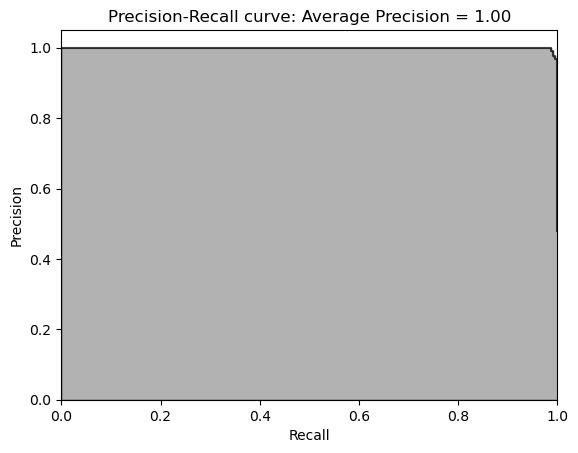

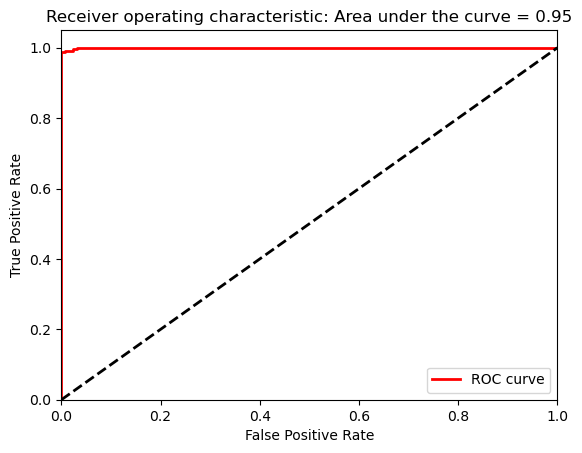

In [172]:
precision, recall, thresholds = precision_recall_curve(y_test_encoded, predictionsTestSetCatBoostingensemble)
average_precision = average_precision_score(y_test_encoded, predictionsTestSetCatBoostingensemble)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))


fpr, tpr, thresholds = roc_curve(y_test_encoded, predictionsTestSetCatBoostingensemble)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Scatter Data for Catboosting

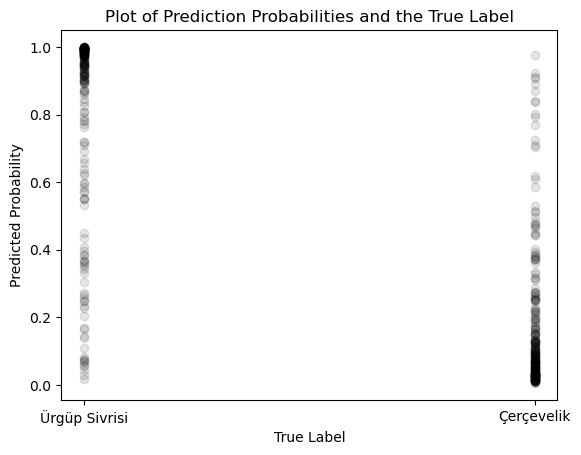

In [146]:
scatterData = predictionsTestSetCatBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', fit_reg=False, scatter_kws={'alpha':0.1}, data=scatterData).set_title('Plot of Prediction Probabilities and the True Label')

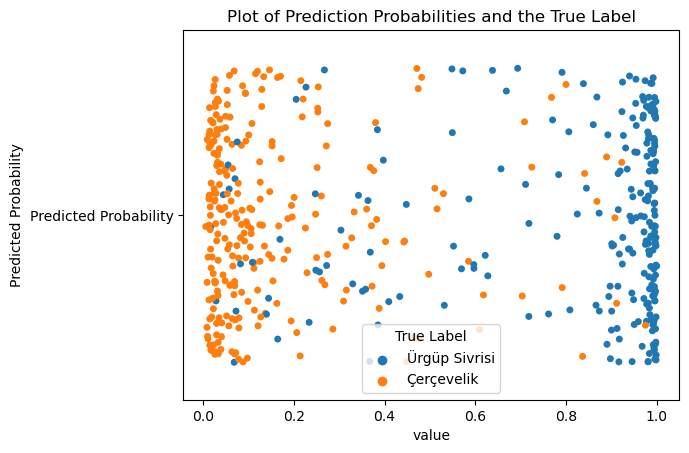

In [147]:
scatterDataMelted = pd.melt(scatterData, "True Label", var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", hue='True Label', jitter=0.4,data=scatterDataMelted).set_title('Plot of Prediction Probabilities and the True Label')

### Scatter Data for ensemble

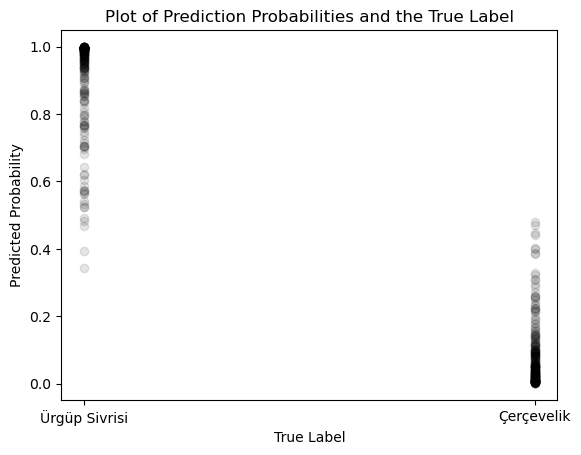

In [175]:
scatterDataensemble = predictionsTestSetCatBoostingensemble.join(y_test,how='left')
scatterDataensemble.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', fit_reg=False, scatter_kws={'alpha':0.1}, data=scatterDataensemble).set_title('Plot of Prediction Probabilities and the True Label')

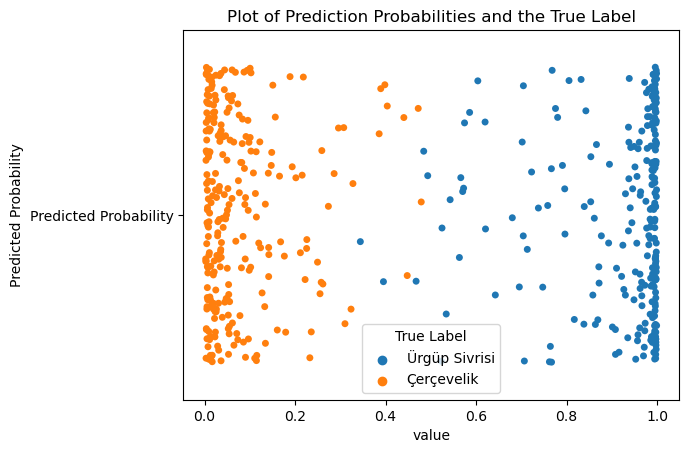

In [176]:
scatterDataMeltedensemble = pd.melt(scatterDataensemble, "True Label", var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", hue='True Label', jitter=0.4,data=scatterDataMeltedensemble).set_title('Plot of Prediction Probabilities and the True Label')